<a href="https://colab.research.google.com/github/ShahaRaz/ML_House_Prices_Preds2021A/blob/main/House_Prices_Predictions_HW4_FIX_0.921.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Key Functions:

In [1]:
def standartize_and_dummie_encoding(df,reset_the_indexes=False):
    #Encode categorical values
    df = pd.get_dummies(df, drop_first=True).reset_index(drop=True)
    #Standardize numerical values
    scaler = preprocessing.StandardScaler()
    scaler.fit(df)
    if reset_the_indexes == True:
        df.reset_index(drop=True, inplace=True) #helps to prevent problems later on
    return df


def manually_standartize_and_dummie_encoding(df):
    numerical_cols, categorical_cols = get_cols_by_type(df)
    

def get_cols_by_type(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
    # display(categorical_cols)
    return numerical_cols, categorical_cols


def get_col_mean(df, column_name):
    return (df[~df[column_name].isnull()])[column_name].mean()

def get_col_median(df, column_name):
    return (df[~df[column_name].isnull()])[column_name].median()

In [2]:
# #use GPU
# %tensorflow_version 2.x
# import tensorflow as tf
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))
# !nvidia-smi

# 1. Details

1. Shahar Raz

2. ML course 2021A

3. Predict house prices 

4. link to kaggle's notebook: https://www.kaggle.com/shaharaz/house-prices-hw2-ml2021a

5. submission: 

![image](https://user-images.githubusercontent.com/55464049/102691741-5e609100-4217-11eb-8570-9ca64214c14b.png)

6. leaderboard position: 

![image](https://user-images.githubusercontent.com/55464049/102691754-7a643280-4217-11eb-8fbd-e9e7c9a1b96c.png)




# 2. Data Description


## 2.1 Import Data & Python Packages

In [3]:
import pandas as pd 
import numpy as np



# seaborn settings: 
import seaborn as sns 
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)
%matplotlib inline 

# sweet Visualisation 
!pip install sweetviz

from sklearn import model_selection
from sklearn import metrics


!pip install --upgrade seaborn 

## Importing seaborn, matplotlab and scipy modules. 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from scipy import stats
import matplotlib.style as style
style.use('fivethirtyeight')


from sklearn import linear_model
from sklearn import pipeline
from sklearn import preprocessing


import matplotlib.style as style
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn import preprocessing

!pip install --upgrade plotly
import plotly.express as px

from sklearn import pipeline
from sklearn import linear_model
from sklearn import metrics
from tqdm.auto import tqdm

from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error


from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import StandardScaler


from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler


from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import cross_val_score

from pprint import pprint


from time import time 
startProgramTime = time()

     |████████████████████████████████| 15.1MB 302kB/s 
     |████████████████████████████████| 71kB 7.6MB/s 
  Found existing installation: tqdm 4.41.1
    Uninstalling tqdm-4.41.1:
      Successfully uninstalled tqdm-4.41.1
     |████████████████████████████████| 286kB 4.3MB/s 
  Found existing installation: seaborn 0.11.0
    Uninstalling seaborn-0.11.0:
      Successfully uninstalled seaborn-0.11.0


     |████████████████████████████████| 13.2MB 333kB/s 
  Found existing installation: plotly 4.4.1
    Uninstalling plotly-4.4.1:
      Successfully uninstalled plotly-4.4.1


## 2.2 Import Data

In [4]:
## gist servers imports: 

!wget https://gist.githubusercontent.com/ShahaRaz/58f401c3d1b1590522f18908a5dc7419/raw/fdf77eb4ebec45735f6f07f79943f790e7396dfc/data_description.txt # txt data description
!wget https://gist.githubusercontent.com/ShahaRaz/58f401c3d1b1590522f18908a5dc7419/raw/fdf77eb4ebec45735f6f07f79943f790e7396dfc/train.csv # train
!wget https://gist.githubusercontent.com/ShahaRaz/58f401c3d1b1590522f18908a5dc7419/raw/fdf77eb4ebec45735f6f07f79943f790e7396dfc/test.csv # test


# # Kaggle Imports: 
# train_1 = pd.read_csv('../input/house-prices-advanced-regression-techniques/train.csv')# kaggle import
# test_1 = pd.read_csv('../input/house-prices-advanced-regression-techniques/test.csv') # kaggle import

#Colab Imports:
train_1 = pd.read_csv('/content/train.csv') # Colab import
test_1 = pd.read_csv('/content/test.csv') # Colab import



display(train_1,test_1)
# _ concat isn't good (asked Aviad)
#
# USAhousing = pd.concat((train_1, test_1)).reset_index(drop = True)
# USAhousing.head()

--2021-01-10 20:22:18--  https://gist.githubusercontent.com/ShahaRaz/58f401c3d1b1590522f18908a5dc7419/raw/fdf77eb4ebec45735f6f07f79943f790e7396dfc/data_description.txt
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13370 (13K) [text/plain]
Saving to: ‘data_description.txt’

data_description.tx 100%[===================>]  13.06K  --.-KB/s    in 0s      

2021-01-10 20:22:18 (120 MB/s) - ‘data_description.txt’ saved [13370/13370]

--2021-01-10 20:22:18--  https://gist.githubusercontent.com/ShahaRaz/58f401c3d1b1590522f18908a5dc7419/raw/fdf77eb4ebec45735f6f07f79943f790e7396dfc/train.csv
Resolving gist.githubusercontent.com (gist.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to gist.githubusercontent.com (gist.githubuser

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,Y,SBrkr,953,694,0,1647,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,Y,SBrkr,2073,0,0,2073,1,0,2,0,3,1,TA,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,Y,SBrkr,1188,1152,0,2340,0,0,2,0,4,1,Gd,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Mn,GLQ,49,Rec,1029,0,1078,G

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,Comp

## 2.3 Exploratory Data Analysis

### 2.3.1 Describe the dataset

In [5]:
print (f"Train has {train_1.shape[0]} rows and {train_1.shape[1]} columns")
print (f"Test has {test_1.shape[0]} rows and {test_1.shape[1]} columns")

Train has 1460 rows and 81 columns
Test has 1459 rows and 80 columns


In [6]:
# gives us statistical info about the numerical variables. 
train_1.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2.3.2 extensive visualisation

We will cut the training set into 2 groups at the same size, by using the median value as a distrebutor. 
this way, we can see what features are mostly effected by the price of the house 

In [7]:
# ## import sweetviz and show report on usedcars_df

# import sweetviz as sw




# # ___ under & above median report

# house_prices_report = sw.compare_intra(train_1, 
#     condition_series=train_1['SalePrice']>get_col_median(train_1,'SalePrice'),
#                                                     names=['above median', 'below median'] )
# house_prices_report.show_notebook()




# # ___ download report 

# house_prices_report.show_html(filepath='SweetViz_report.html') 


# ## SweetViz_report.html desctibes the above
# ###########################################################

# # ___ basic report

# house_prices_report = sw.analyze(train_1,target_feat='SalePrice') 



### 2.3.3 glimpse at our target - Sale Price: 

Statistics:
![Statistics:](https://user-images.githubusercontent.com/55464049/101274574-0b62f480-37a8-11eb-8254-f4512ede5e28.png)


Histogram:
![Histogram](https://user-images.githubusercontent.com/55464049/101274629-71e81280-37a8-11eb-923c-8510a7dba347.png)


Eyes on the prize:

Our target in this notebook would be to predict the sale price of houses, we'll expect most of the prices to be between 130k-214k $.
lets start preproccess the input data

## 2.4 Preproccessing - Missing Values

### 2.4.1 check out missing values

In [8]:
# Missing Values & Precentage: 
def missing_percentage(df):
    """This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage"""
    ## the two following line may seem complicated but its actually very simple. 
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2)[round(df.isnull().sum().sort_values(ascending = False)/len(df)*100,2) != 0]
    #TODO: add datatype near this list.
    return pd.concat([total, percent], axis=1, keys=['Total','Percent'])


train_missing = missing_percentage(train_1)
test_missing = missing_percentage(test_1)

print('train missing:')
display (train_missing)
print('test missing:')
display (test_missing)

train missing:


,Total,Percent
PoolQC,1453,99.52
MiscFeature,1406,96.30
Alley,1369,93.77
Fence,1179,80.75
FireplaceQu,690,47.26
LotFrontage,259,17.74
GarageCond,81,5.55
GarageType,81,5.55
GarageYrBlt,81,5.55
GarageFinish,81,5.55


test missing:


,Total,Percent
PoolQC,1456,99.79
MiscFeature,1408,96.50
Alley,1352,92.67
Fence,1169,80.12
FireplaceQu,730,50.03
LotFrontage,227,15.56
GarageCond,78,5.35
GarageQual,78,5.35
GarageYrBlt,78,5.35
GarageFinish,78,5.35


### 2.4.2 choose method to fill with

for the other missing values, we will complete by enter constant (explenation ahead)


There isn't 1 correct way of completing these values.  
There are few options for this:  
1. Enter a **constant** value.  
For continuous values, the constant value can be calculated from the rest of the values in the column (min, max, mean, median, etc.) or derived from expert knowledge.  
For categorical values, the constant value can be one of the values in the column or a different value not present in the column.
2. Enter **random** values.  
Continuous values can be randomly picked from the values of the column, or be randomly generated from the range of the optional values in the column.  
Categorical variables can be randomly picked from the values in the column. We can use normal distribution or column distribution.
3. Enter **prediction** of the values.   
For continuous values, we can use regression methods to predict the missing values.   
For categorical values, we can use classification mathods to predict the missing values.   

Ordinal features are something between categorical and numerical features, so each one of the methods can work for them.  


#### 2.4.2.1 median,mean, distribution

In [9]:
# for the next section we will change the train data: so we'll create a dup to train:
train_2_miss_vals = train_1.copy()

In [10]:
# fill empty values in the dataframe
#__________________________________________ 1. filling constant
def fill_na_median(df, column_name):
    # display(column_name, '____________')
    # display(df[column_name].dtype)
    # display(df[column_name].head())
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna((df_not_null[column_name]).astype(float).median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

#__________________________________________ 2. enter random (based on disturbution)
def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    # options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

    
## Replaced all missing values in LotFrontage by imputing the mean value of each neighborhood. 
# loot frontage - (15% missing) - usually the houses in the same neighborhood has the same frontage
train_2_miss_vals['LotFrontage'] = train_2_miss_vals.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))
    

# fill_na_random_pick_column_distribution(USAhousing,'Electrical')

    

#### 2.4.2.2 predict missing values

In [11]:
##___________________________________________3. IN ONE FUNCTION (FIXME!):
    #list all columns who have any missing data (one missing value,or more)
def fill_all_cols_by_prediction(df):
    categorical_cols_to_fill=[] #  predict by classifier
    numerical_cols_to_fill=[] #  predict by regressor
    for col in df.columns:
        if df[col].isnull().any():
            if df.dtypes[col] == 'object':
                categorical_cols_to_fill.append(col)
            else:
                numerical_cols_to_fill.append(col)

    # Encoding categorical columns in dataset
    # if len(categorical_cols_to_fill)>0:
    #     df = pd.get_dummies(df,drop_first=True).reset_index(drop=True)
            # drop_first=True -> dummies insteat of oneHot
    display(categorical_cols_to_fill)

    for col in categorical_cols_to_fill:
        fill_categorical_col_by_classifier(df,col)


    for col in numerical_cols_to_fill:
        fill_numerical_col_by_regressor(df,col)





def fill_numerical_col_by_regressor(df,col):
    # drop null rows
    missing_columns = df.columns[df.isnull().any()]

    # drop other null columns
    X = df.dropna().drop(missing_columns, axis=1)

    # drop null rows and exclude target column
    t = df.dropna()[col]

    X = standartize_and_dummie_encoding(X)

    # create and fit regressor model
    model = make_pipeline(StandardScaler(), SGDRegressor(random_state = 1))
    model.fit(X, t)

    # (df.(all rows where df[target] is null).drop(previously null columns))
    missing = df[df[col].isnull()].drop(missing_columns, axis=1)

    # predict values
    predictions = model.predict(missing)

    # fill null values in target column with predicted values
    df[col] = df[col].fillna(dict(zip(df[df[col].isnull()].index.tolist(), predictions)))




def fill_categorical_col_by_classifier(df,col):
    display(df)
    #1. drop null rows and target column from train dataset
    X = df.dropna().drop(col, axis=1)

    # drop null rows from train dataset and exclude target column
    t = df.dropna()[col]

    X = standartize_and_dummie_encoding(X)

    # split to train and validation
    
    X_train, X_test, t_train, t_test = train_test_split(X, t, test_size = 0.3, random_state = 1)

    # create and fit classifier
    SGD_cls = pipeline.make_pipeline(preprocessing.StandardScaler(), linear_model.SGDClassifier(loss='log', alpha=0, learning_rate='constant', eta0=0.01)).fit(X_train, t_train)

    # (df.(all rows where df[target] is null).drop(all null columns))
    missing = df[df[col].isnull()].dropna(axis=1)

    # predict values
    predictions = SGD_cls.predict(missing)

    # fill null values in target column with predicted values
    df[col] = df[col].fillna(dict(zip(df[df[col].isnull()].index.tolist(), predictions)))



In [12]:
## Some missing values are intentionally left blank, for example: In the Alley feature 
## there are blank values meaning that there are no alley's in that specific house. 

def fill_blank_categorical(df):
    missing_val_col = ["Alley", 
                       "PoolQC", 
                       "MiscFeature",
                       "Fence",
                       "FireplaceQu",
                       "GarageType",
                       "GarageFinish",
                       "GarageQual",
                       "GarageCond",
                       'BsmtQual',
                       'BsmtCond',
                       'BsmtExposure',
                       'BsmtFinType1',
                       'BsmtFinType2',
                       'MasVnrType']

    for i in missing_val_col:
        df[i] = df[i].fillna('None')
    return df 


train_2_miss_vals = fill_blank_categorical(train_2_miss_vals)

In [13]:
## In the following features the null values are there for a purpose, so we replace them with "0"

def fill_blank_numerical(df):
    missing_val_col2 = ['BsmtFinSF1',
                        'BsmtFinSF2',
                        'BsmtUnfSF',
                        'TotalBsmtSF',
                        'BsmtFullBath', 
                        'BsmtHalfBath', 
                        'GarageYrBlt',
                        'GarageArea',
                        'GarageCars',
                        'MasVnrArea']

    for i in missing_val_col2:
        df[i] = df[i].fillna(0)
    return df

train_2_miss_vals = fill_blank_numerical(train_2_miss_vals)

now: lets predict the all the missing alleys by a simple random forest classifier:

In [14]:
# Missing Values & Precentage: 
missing_percentage(train_2_miss_vals)


,Total,Percent
Electrical,1,0.07


In [15]:
# handle missing values

# https://www.youtube.com/watch?v=mqI7xtlE2VU&ab_channel=JoeJames
train_2_miss_vals.dropna(inplace=True) # Drops one row with the missing Electrical value.
train_2_miss_vals.reset_index(drop=True, inplace=True)


In [16]:
## ___Uncomment intire cell to create new Sweetviz Report___
# house_prices_report = sw.compare_intra(train_2_miss_vals, 
#     condition_series=train_2_miss_vals['SalePrice']>get_col_median(train_2_miss_vals,'SalePrice'),
#                                                     names=['above median', 'below median'] )
# house_prices_report.show_notebook()

# house_prices_report.show_html(filepath='train_2_SweetViz.html')

Let's create a simple pair plots to check out the data:

Merging Pool Info (Pool size and Quality) to one var: TODO 
Merging Fireplace info (Quality and count 

#### Noticable Warrnings in the data from pandas_profiling

PoolQC has 1456 (99.8%) missing values

MiscFeature has 1408 (96.5%) missing values

Alley has 1352 (92.7%) missing values

### Observation
* There are multiple types of features.
* Some features have missing values.
* Most of the features are object( includes string values in the variable).

We want to focus on the target variable which is SalePrice. Let's create a histogram to see if the target variable is Normally distributed. If we want to create any linear model, it is essential that the features are normally distributed. 

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.11.1)


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.6/dist-packages/seaborn/_core.py:1303: UserWarning:

Vertical orientation ignored with only `x` specified.



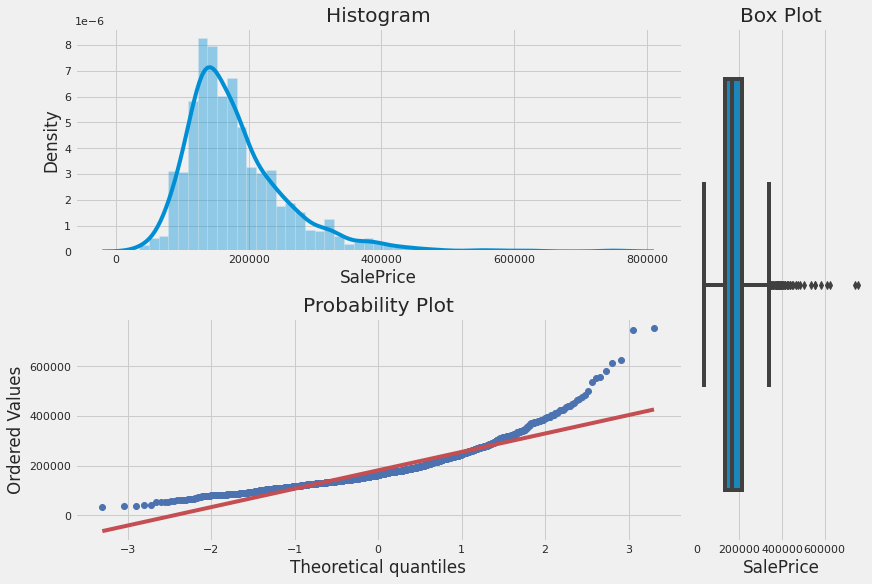

In [17]:
!pip install --upgrade seaborn 
def plotting_3_chart(df, feature):
    ## Importing seaborn, matplotlab and scipy modules. 
    # import seaborn as sns
    # import matplotlib.pyplot as plt
    # import matplotlib.gridspec as gridspec
    # from scipy import stats
    # import matplotlib.style as style
    # style.use('fivethirtyeight')

    ## Creating a customized chart. and giving in figsize and everything. 
    fig = plt.figure(constrained_layout=True, figsize=(12,8))
    ## creating a grid of 3 cols and 3 rows. 
    grid = gridspec.GridSpec(ncols=3, nrows=3, figure=fig)
    #gs = fig3.add_gridspec(3, 3)

    ## Customizing the histogram grid. 
    ax1 = fig.add_subplot(grid[0, :2])
    ## Set the title. 
    ax1.set_title('Histogram')
    ## plot the histogram. 
    sns.distplot(df.loc[:,feature], norm_hist=True, ax = ax1)

    # customizing the QQ_plot. 
    ax2 = fig.add_subplot(grid[1, :2])
    ## Set the title. 
    ax2.set_title('QQ_plot')
    ## Plotting the QQ_Plot. 
    stats.probplot(df.loc[:,feature], plot = ax2)

    ## Customizing the Box Plot. 
    ax3 = fig.add_subplot(grid[:, 2])
    ## Set title. 
    ax3.set_title('Box Plot')
    ## Plotting the box plot. 
    sns.boxplot(df.loc[:,feature], orient='v', ax = ax3 );
    
plotting_3_chart(train_2_miss_vals, 'SalePrice')

In [18]:
#skewness and kurtosis
print("Skewness: " + str(train_2_miss_vals['SalePrice'].skew()))
print("Kurtosis: " + str(train_2_miss_vals['SalePrice'].kurt()))

Skewness: 1.8819429948035529
Kurtosis: 6.529263049673958


It looks like there are quite a bit Skewness and Kurtosis in the target variable. Let's talk about those a bit. 

<b>Skewness</b> 
* is the degree of distortion from the symmetrical bell curve or the normal curve. 
* So, a symmetrical distribution will have a skewness of "0". 
* There are two types of Skewness: <b>Positive and Negative.</b> 
* <b>Positive Skewness</b>(similar to our target variable distribution) means the tail on the right side of the distribution is longer and fatter. 
* In <b>positive Skewness </b> the mean and median will be greater than the mode similar to this dataset. Which means more houses were sold by less than the average price. 
* <b>Negative Skewness</b> means the tail on the left side of the distribution is longer and fatter.
* In <b>negative Skewness </b> the mean and median will be less than the mode. 
* Skewness differentiates in extreme values in one versus the other tail. 

Here is a picture to make more sense.  
![image](https://cdn-images-1.medium.com/max/1600/1*nj-Ch3AUFmkd0JUSOW_bTQ.jpeg)


<b>Kurtosis</b>
According to Wikipedia, 

*In probability theory and statistics, **Kurtosis** is the measure of the "tailedness" of the probability. distribution of a real-valued random variable.* So, In other words, **it is the measure of the extreme values(outliers) present in the distribution.** 

* There are three types of Kurtosis: <b>Mesokurtic, Leptokurtic, and Platykurtic</b>. 
* Mesokurtic is similar to the normal curve with the standard value of 3. This means that the extreme values of this distribution are similar to that of a normal distribution. 
* Leptokurtic Example of leptokurtic distributions are the T-distributions with small degrees of freedom.
* Platykurtic: Platykurtic describes a particular statistical distribution with thinner tails than a normal distribution. Because this distribution has thin tails, it has fewer outliers (e.g., extreme values three or more standard deviations from the mean) than do mesokurtic and leptokurtic distributions. 

![image](https://i2.wp.com/mvpprograms.com/help/images/KurtosisPict.jpg?resize=375%2C234)


You can read more about this from [this](https://codeburst.io/2-important-statistics-terms-you-need-to-know-in-data-science-skewness-and-kurtosis-388fef94eeaa) article. 

We can fix this by using different types of transformation(more on this later). However, before doing that, I want to find out the relationships among the target variable and other predictor variables. Let's find out.

#3. Feature Engieneering

In [19]:
train_3_feature_eng = train_2_miss_vals.copy() #df after finish handling missing values.

## 3.1 MODEL TEST

### 3.1.1 single model score

In [20]:
# from sklearn import linear_model
# from sklearn import pipeline
# from sklearn import preprocessing
#_______________________Check out the Current model:____________________________
def check_current_score(df,selected_features=None,is_displaying_table = False): #selected is array of Strings
    #1b. set the X (input data) for the test:
    if selected_features == None:
        X_test_temp = df.copy()
        X_test_temp.drop('SalePrice')
    else:
        X_test_temp = df[selected_features]

    #2. get the true expected results:
    t_train_temp = df['SalePrice']

    #3 turn categorical to dummy encoded 
    X_test_temp = standartize_and_dummie_encoding(X_test_temp) ###
    
    ### X_test_temp = pd.get_dummies(X_test_temp, drop_first=True).reset_index(drop=True)
    if is_displaying_table:
        display(X_test_temp) # check it out

    #4. split set to train & validation:
    # from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_test_temp, t_train_temp, test_size = 0.3, random_state = 1)

    #5. create and fit the linear regression (with pipeline that starts with standartize the numeric values:)
    lin_reg = linear_model.LinearRegression()
    lin_reg.fit(X_train,y_train)
    ### lin_reg = pipeline.make_pipeline(preprocessing.StandardScaler(),linear_model.LinearRegression())
    ### lin_reg.fit(X_train,y_train) # train the model.

    #6. return the accuracy score and CE loss of the train and test
    print('________________Scores are:_____________________')
    print('Accuracy score on train', lin_reg.score(X_train, y_train))
    print('Accuracy score on validation', lin_reg.score(X_test, y_test))
    return lin_reg.score(X_train, y_train),lin_reg.score(X_test, y_test)


#___________________________ example of activation: ___________________________
#1a. get set the features for the training: 
example_selected_features = ['MSZoning', # The general zoning classification
                            'LotArea', # Lot size in square feet
                            'Utilities',#  Type of utilities available
                            'SaleCondition' # Condition of sale 7                          
                            ]
score_train,score_val = check_current_score(train_3_feature_eng,example_selected_features)

________________Scores are:_____________________
Accuracy score on train 0.2720870108387424
Accuracy score on validation 0.21035626412934316


### 3.1.2 cross validation model

In [21]:
from sklearn.model_selection import KFold
from tqdm.auto import tqdm

def find_generator_len(generator, use_pbar=True):
    i = 0
    
    if use_pbar:
        pbar = tqdm(desc='Calculating Length', ncols=1000, bar_format='{desc}{bar:10}{r_bar}')

    for a in generator:
        i += 1

        if use_pbar:
            pbar.update()

    if use_pbar:
        pbar.close()

    return i

# Note, this function is somtimes replaceable with (modelName).get_n_splits
# for example: in k-fold
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.KFold.html

In [22]:
# calculate score and loss from cv (KFold or LPO) and display graphs
def get_cv_score_and_loss(X, t, model=linear_model.LinearRegression(), k=None, p=None, show_score_loss_graphs=False, use_pbar=True):
    #1. create dataframe to save the calculated data
    scores_losses_df = pd.DataFrame(columns=['fold_id', 'split', 'score', 'loss'])
    
    #2. choose the type of cross validation
    if k is not None:
        cv = KFold(n_splits=k, shuffle=True, random_state=1)
    elif p is not None:
        cv = LeavePOut(p)
    else:
        raise ValueError('you need to specify k or p in order for the cv to work')

    #a1. init progress bar, find the lenght of the split
    if use_pbar:
        pbar = tqdm(desc='Computing Models', total=find_generator_len(cv.split(X)))

    #3. split data to k groups (in k fold) [and more in leavePOut]
    for i, (train_ids, val_ids) in enumerate(cv.split(X)):
        #4. build the sub-groups based on the split made
        X_train = X.loc[train_ids]
        t_train = t.loc[train_ids]
        X_val = X.loc[val_ids]
        t_val = t.loc[val_ids]

        #5. fit the model
        model.fit(X_train, t_train)
        #6.make predictions for all the examples
        y_train = model.predict(X_train)
        y_val = model.predict(X_val)
        #7. save the scores and errors to the df we made at [#1] (at the end of the df)
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'train', model.score(X_train, t_train), mean_squared_error(t_train, y_train)]
        scores_losses_df.loc[len(scores_losses_df)] = [i, 'val', model.score(X_val, t_val), mean_squared_error(t_val, y_val)]
        #a2. move the pbar forward
        if use_pbar:
            pbar.update()
    #a3. close the pbar (makes it blue)
    if use_pbar:
        pbar.close()

    ## Note: now we got the results of the scores and losses for each split[val or train] and for each fold_id
    ## now we want to make 2 graphs, one for score, and one for loss
    # display(scores_losses_df)
    val_scores_losses_df = scores_losses_df[scores_losses_df['split']=='val']
    train_scores_losses_df = scores_losses_df[scores_losses_df['split']=='train']

    #8. create the means (r2 & loss) for each split, inorder to really evaluate the model. 
    mean_val_score = val_scores_losses_df['score'].mean()
    mean_val_loss = val_scores_losses_df['loss'].mean()
    mean_train_score = train_scores_losses_df['score'].mean()
    mean_train_loss = train_scores_losses_df['loss'].mean()

    #9 plot the graph
    if show_score_loss_graphs:
        fig = px.line(scores_losses_df, x='fold_id', y='score', color='split', title=f'Mean Val Score: {mean_val_score:.2f}, Mean Train Score: {mean_train_score:.2f}')
        fig.show()
        fig = px.line(scores_losses_df, x='fold_id', y='loss', color='split', title=f'Mean Val Loss: {mean_val_loss:.2f}, Mean Train Loss: {mean_train_loss:.2f}')
        fig.show()

    return mean_val_score, mean_val_loss, mean_train_score, mean_train_loss




# get_cv_score_and_loss(X, t,  k=10, show_score_loss_graphs=True)


# score_train,score_val = check_current_score(train_3_feature_eng,example_selected_features)

In [23]:
#_______________________Check out the Current model:____________________________
def cross_validation_check_current_score(df,selected_features=None,is_displaying_table = False): #selected is array of Strings
    #1b. set the X (input data) for the test:
    if selected_features == None:
        X_test_temp = df.copy()
        X_test_temp.drop('SalePrice',axis=1)
    else:
        X_test_temp = df[selected_features]

    #2. get the true expected results:
    t_train_temp = df['SalePrice']

    #3 turn categorical to dummy encoded 
    X_test_temp = standartize_and_dummie_encoding(X_test_temp) ###
    ### X_test_temp = pd.get_dummies(X_test_temp, drop_first=True).reset_index(drop=True)
    if is_displaying_table:
        display(X_test_temp) # check it out

    #4. send to cross validation testing
    mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(X_test_temp,t_train_temp, k=10, use_pbar=False)

    #6. return the accuracy score and CE loss of the train and test
    print('________________Scores are:_____________________', (mean_val_score*100), "%" )
    print('r2 Accuracy score on _validation_ : ',mean_val_score)
    print('r2 accuracy score on train: ', mean_train_score)

    print('________________Losses are:_____________________')
    print('Mean Squared Error loss, on _validation_ : ',mean_val_loss)
    print('Mean Squared Error loss, on train: ', mean_train_loss)


    return mean_val_score, mean_train_score, mean_val_loss, mean_train_loss


#___________________________ example of activation: ___________________________
#1a. get set the features for the training: 
example_selected_features = ['MSZoning', # The general zoning classification
                            'LotArea', # Lot size in square feet
                            'Utilities',#  Type of utilities available
                            'SaleCondition' # Condition of sale 7                          
                            ]
score_train, score_val,mean_val_loss, mean_train_loss = cross_validation_check_current_score(train_3_feature_eng, example_selected_features)

________________Scores are:_____________________ 23.987565292214025 %
r2 Accuracy score on _validation_ :  0.23987565292214025
r2 accuracy score on train:  0.2584075375380158
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  4784845092.078639
Mean Squared Error loss, on train:  4680155232.535085



### 3.3.3 Compare 2 datasets 

In [24]:
def compare_2_datasets(df1,df2):
    set1result_mean_val_score  = cross_validation_check_current_score(df1)
    set2result_mean_val_score  = cross_validation_check_current_score(df2)
    print('___________________results are ________________________')
    print('df1 mean_val_score = ', set1result_mean_val_score) 
    print('df2 mean_val_score = ', set2result_mean_val_score) 
    result = set1result_mean_val_score[2] - set2result_mean_val_score[2]
    print('(possitive means df2 is better) MSError_df1 - MSError_df2 = ', result)


## 3.2 hunch features score
after looking at the data and exploring the description, I made up a list of the features that i belived would be the most segnificant.
that list was made before even taking a look at the SweetViz's data.


In [25]:
manually_selected_features = ['MSZoning', # The general zoning classification
                              'LotArea', # Lot size in square feet
                              'Utilities',#  Type of utilities available
                              'Neighborhood', #  Physical locations within Ames city limits
                              'Condition1', # Proximity to main road or railroad
                              'BldgType', #Type of dwelling
                              'OverallCond', # Overall condition rating [1,9
                              'YearBuilt', # Original construction date
                              'YearRemodAdd', # Remodel year
                              'MasVnrType',# Masonry veneer type [agro, living, factories]
                              'MasVnrArea', # veneer area in square feet
                              'Foundation', # Type of foundation
                              '1stFlrSF', # First Floor square feet 8
                              '2ndFlrSF', # Second floor square feet 6
                              'BedroomAbvGr', # Number of bedrooms above basement level 
                              'KitchenAbvGr' , # Number of kitchens
                              'Functional' , # Home functionality rating 6
                              'GarageArea' , # Size of garage in square feet 
                              'EnclosedPorch' , #  Enclosed porch area in square feet 6
                              '3SsnPorch' , #  Three season porch area in square feet 6
                              'PoolArea' , # Pool area in square feet 6
                              'MiscVal' , # $Value of miscellaneous feature 6
                              'YrSold' , #  Year Sold 8
                              'SaleType' , # Type of sale 7
                              'SaleCondition'] # Condition of sale 7.

cross_validation_check_current_score(train_3_feature_eng,manually_selected_features)

________________Scores are:_____________________ 78.07138333858374 %
r2 Accuracy score on _validation_ :  0.7807138333858374
r2 accuracy score on train:  0.83561638751086
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  1369973967.8898656
Mean Squared Error loss, on train:  1037335230.5080817


(0.7807138333858374, 0.83561638751086, 1369973967.8898656, 1037335230.5080817)

Looks like my hunch wasn't bad, we got a score of 84.2% on the validation.

Now, lets look for ways to improve this current score.

## 3.3 Correlations exploration

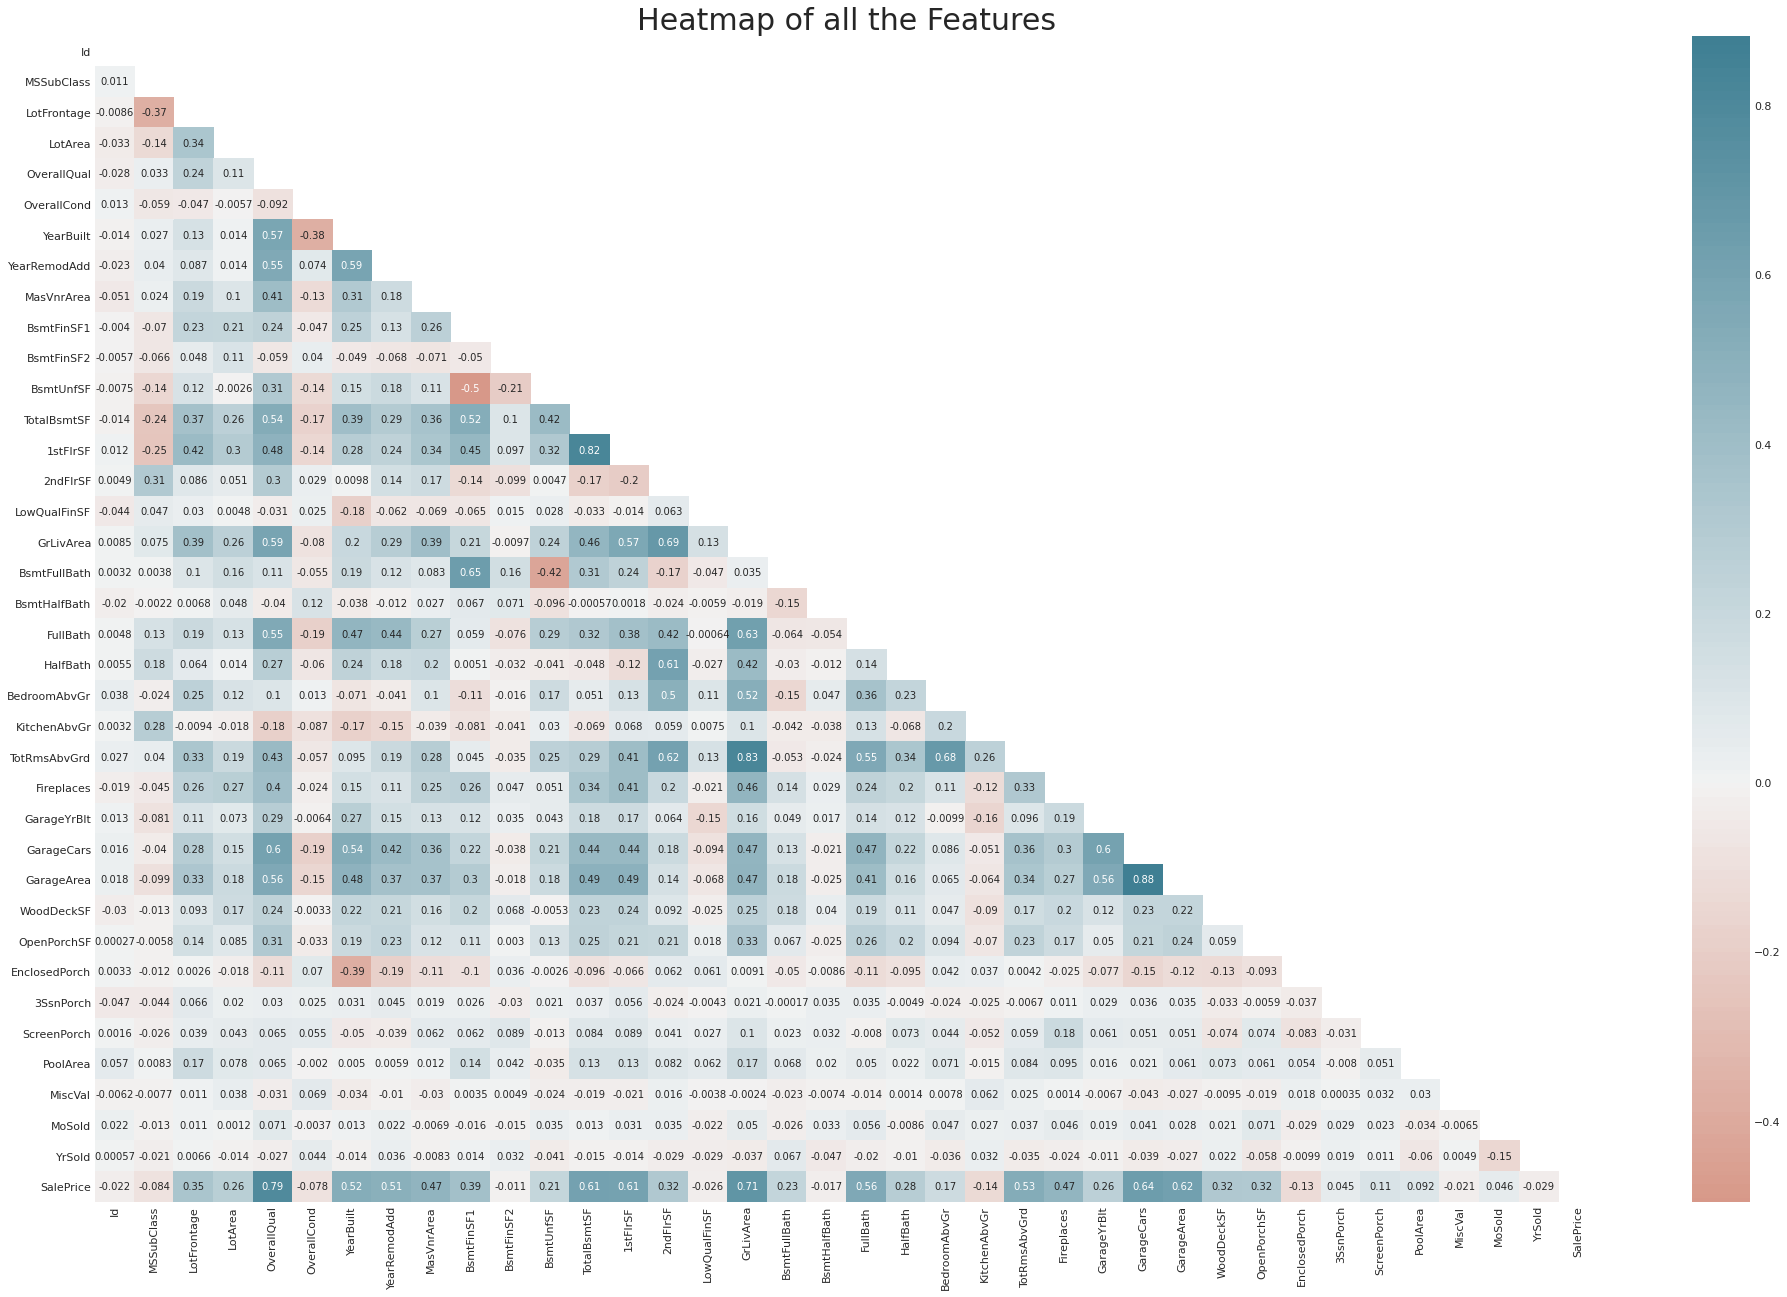

In [26]:
# import matplotlib.style as style
# import matplotlib.pyplot as plt
## Plot fig sizing. 
style.use('ggplot')
sns.set_style('whitegrid')
plt.subplots(figsize = (30,20))
## Plotting heatmap. 

# Generate a mask for the upper triangle (taken from seaborn example gallery)
mask = np.zeros_like(train_3_feature_eng.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(train_3_feature_eng.corr(), 
            cmap=sns.diverging_palette(20, 220, n=200), 
            mask = mask, 
            annot=True, 
            center = 0, 
           );
## Give title. 
plt.title("Heatmap of all the Features", fontsize = 30);

some features shown great correlation with SalePrice: since the graph is full, ill add snippets:


![image](https://user-images.githubusercontent.com/55464049/101275156-20418700-37ac-11eb-8bd9-6b92201e367e.png)

![image](https://user-images.githubusercontent.com/55464049/101275163-2b94b280-37ac-11eb-9989-db31a44a718a.png)

![image](https://user-images.githubusercontent.com/55464049/101275176-394a3800-37ac-11eb-8500-50a993d3d1c2.png)

lets get correlations as list
* square the result inorder to preserve magnitude (negative correlations on top of list too)

In [27]:
## Getting the correlation of all the features with target variable. 
display((train_3_feature_eng.corr()**2)["SalePrice"].sort_values(ascending = False)[1:])



OverallQual      0.625790
GrLivArea        0.502139
GarageCars       0.410206
GarageArea       0.388656
TotalBsmtSF      0.376879
1stFlrSF         0.367197
FullBath         0.314587
TotRmsAbvGrd     0.284920
YearBuilt        0.273815
YearRemodAdd     0.257485
MasVnrArea       0.223356
Fireplaces       0.218059
BsmtFinSF1       0.149333
LotFrontage      0.120394
WoodDeckSF       0.105250
2ndFlrSF         0.102057
OpenPorchSF      0.099749
HalfBath         0.080883
LotArea          0.069610
GarageYrBlt      0.068337
BsmtFullBath     0.051566
BsmtUnfSF        0.045987
BedroomAbvGr     0.028303
KitchenAbvGr     0.018478
EnclosedPorch    0.016545
ScreenPorch      0.012414
PoolArea         0.008537
MSSubClass       0.007095
OverallCond      0.006072
MoSold           0.002151
3SsnPorch        0.001987
YrSold           0.000836
LowQualFinSF     0.000656
Id               0.000473
MiscVal          0.000449
BsmtHalfBath     0.000285
BsmtFinSF2       0.000130
Name: SalePrice, dtype: float64

In [28]:
def customized_scatterplot(y, x):
        ## Sizing the plot. 
    # style.use('fivethirtyeightF')
    plt.subplots(figsize = (12,8))
    ## Plotting target variable with predictor variable(OverallQual)
    sns.scatterplot(y = y, x = x);

### 3.3.1 OverallQual vs. Price
overall house quality

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



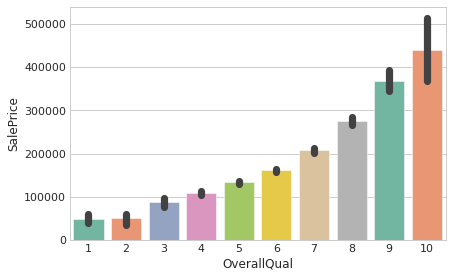

In [29]:
sns.barplot('OverallQual', 'SalePrice', data=train_3_feature_eng, palette='Set2', color="teal")
plt.show()

There is an apparent relationship between the two features. The price of the houses increases with the overall quality. Let's check out some more features to determine the outliers.

### 3.3.2 GrLivArea vs. Price

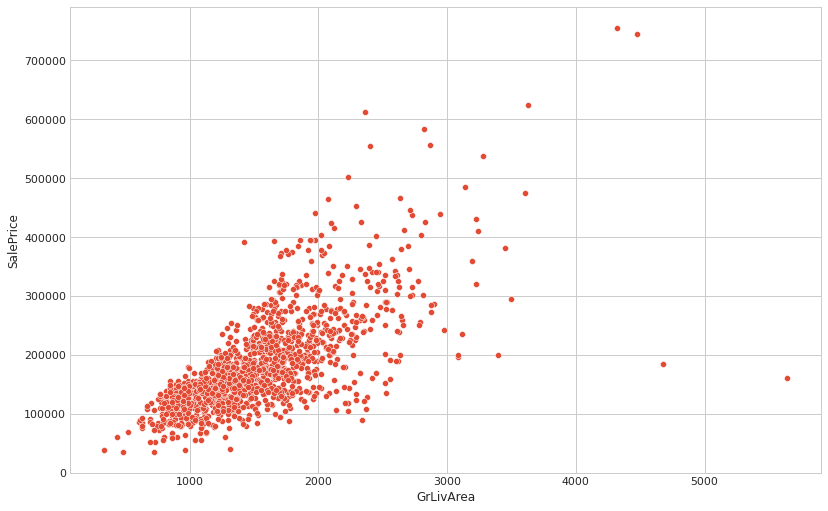

In [30]:
customized_scatterplot(train_3_feature_eng.SalePrice, train_3_feature_eng.GrLivArea)

### 3.3.3 GarageArea vs. Price

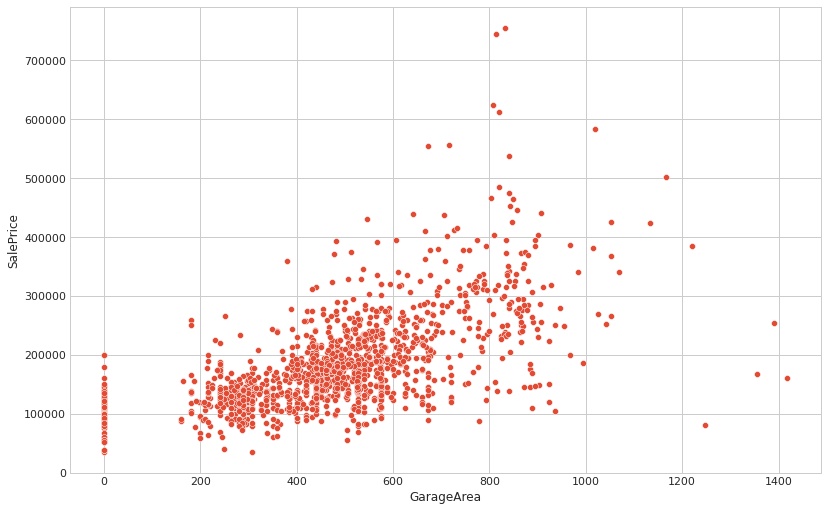

In [31]:
customized_scatterplot(train_3_feature_eng.SalePrice, train_3_feature_eng.GarageArea);

### 3.3.4 TotalBsmtSF vs. Price
Total Area of Basment

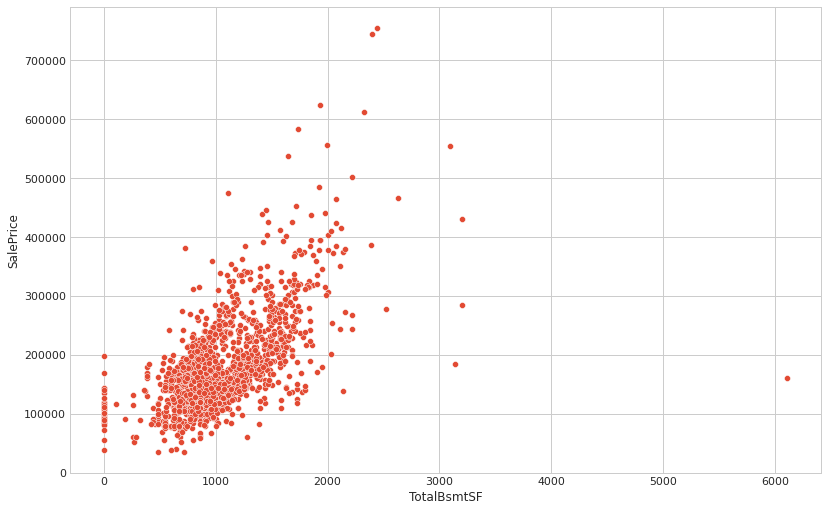

In [32]:
customized_scatterplot(train_3_feature_eng.SalePrice, train_3_feature_eng.TotalBsmtSF)

Between 3.3.2-4: We notice some outliers that we will take care down the road

### 3.3.5 FullBath vs. Price
Full Bathrooms

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



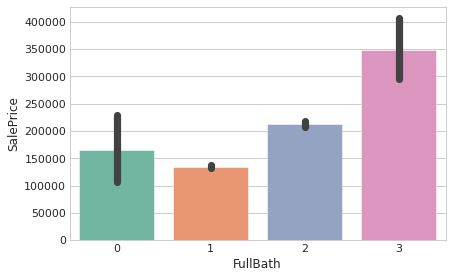

In [33]:
sns.barplot('FullBath', 'SalePrice', data=train_3_feature_eng, palette='Set2', color="teal")
plt.show()

The median of houses with 0 full bathrooms is higher then the once with 1 full.
lets see what is heppening with half bathrooms:
  

### 3.3.6 HalfBath vs. Price

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



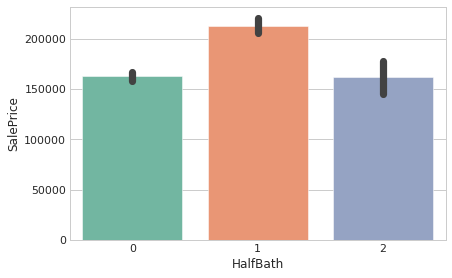

In [34]:
sns.barplot('HalfBath', 'SalePrice', data=train_3_feature_eng, palette='Set2', color="teal")
plt.show()

i belive that this has to do with the fact that buildings in desired places locations are expensive, usually small and have only 1 half bathroom and no full one. We will explore this theorm in a bit. 

## 3.4 Creating New features

In [35]:
def add_newly_created_features(df_origin):
    df = df_origin.copy()
    # lets calculate the age of the house
    df['house_age'] = (df['YrSold'] - df['YearBuilt']) # the age of the house when it was sold
    # test_1['house_age'] = (2021- test_1['YearBuilt']) # consider we predict for 2021

    #total house surface area 
    df['TotalSF'] = (df['TotalBsmtSF'] 
                           + df['1stFlrSF'] 
                           + df['2ndFlrSF'])

    df['Total_basment_area'] = (df['BsmtFinSF1'] 
                                     + df['BsmtFinSF2'] 
                                     + df['1stFlrSF'] 
                                     + df['2ndFlrSF']
                                    )


    df['Total_Bathrooms'] = (df['FullBath'] 
                                   + (0.5 * df['HalfBath']) 
                                   + df['BsmtFullBath'] 
                                   + (0.5 * df['BsmtHalfBath'])
                                  )


    df['Total_porch_sf'] = (df['OpenPorchSF'] 
                              + df['3SsnPorch'] 
                              + df['EnclosedPorch'] 
                              + df['ScreenPorch'] 
                              + df['WoodDeckSF']
                             )
    
    df['exists_pool'] =df['PoolArea'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_garage'] =df['GarageArea'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_fireplace'] =df['Fireplaces'].apply(lambda x: 1 if x > 0 else 0)
    df['exists_bsmt'] =df['TotalBsmtSF'].apply(lambda x: 1 if x > 0 else 0)
    df['old_house'] =df['YearBuilt'].apply(lambda x: 1 if x <1990 else 0)

    df['Total_Sqaure_fit'] = (df['TotalSF'] + df['Total_basment_area'])


    df['YrBltRmd']=df['YearBuilt']+df['YearRemodAdd']
    
    # interpulations 
    df['LotFrontage2'] = df['LotFrontage'].fillna(df.groupby('1stFlrSF')['LotFrontage'].transform('mean'))
    df['LotFrontage2'].interpolate(method='linear',inplace=True)
    df['LotFrontage2']=df['LotFrontage'].astype(int)
    df['MasVnrArea2'] = df['MasVnrArea'].fillna(df.groupby('MasVnrType')['MasVnrArea'].transform('mean'))
    df['MasVnrArea2'].interpolate(method='linear',inplace=True)
    df['MasVnrArea2']=df['MasVnrArea'].astype(int)
    return df

train_3_4_creating_features = add_newly_created_features(train_3_feature_eng)





# train_3_4_creating_features = train_3_feature_eng.copy()
# train_3_4_creating_features.

compare_2_datasets(train_3_feature_eng,train_3_4_creating_features) # fix me to use MSE
# def compare_2_datasets(df1,df2):
#     set1result_mean_val_score = cross_validation_check_current_score(df1)
#     set2result_mean_val_score = cross_validation_check_current_score(df2)
#     print('df1 mean_val_score = ', set1result_mean_val_score) 
#     print('df2 mean_val_score = ', set2result_mean_val_score) 
#     print('(possitive means df2 is better) df1 - df2 = ', (set1result_mean_val_score - set2result_mean_val_score))



________________Scores are:_____________________ 100.0 %
r2 Accuracy score on _validation_ :  1.0
r2 accuracy score on train:  1.0
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  1.2739911924222348e-20
Mean Squared Error loss, on train:  1.2952810842304722e-20
________________Scores are:_____________________ 100.0 %
r2 Accuracy score on _validation_ :  1.0
r2 accuracy score on train:  1.0
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  9.018868829410463e-21
Mean Squared Error loss, on train:  9.755243218298062e-21
___________________results are ________________________
df1 mean_val_score =  (1.0, 1.0, 1.2739911924222348e-20, 1.2952810842304722e-20)
df2 mean_val_score =  (1.0, 1.0, 9.018868829410463e-21, 9.755243218298062e-21)
(possitive means df2 is better) MSError_df1 - MSError_df2 =  3.7210430948118846e-21


We can see that The error on the new model is smaller.
So lets save the new features to our data set! 

In [36]:
train_3_feature_eng = train_3_4_creating_features

##  3.5 Drop unnecessary values

AFTER CHECKING WORKING ALL THE WAY, I FOUND THAT NO COLUMN NEEDS TO BE REMOVED (
- even the ID is used in stage 4
1.  id is distinct and not helpful by definition of uniqueness
1.  miscFeatures are features that not covered in other categories
1.  Alley: Type of alley access to property, has 1352 (92.7%) missing values
1.  Fence: has fance or not (80% missing values)
1.  Street: Type of road access to property [Paved or not] 
1.  FireplaceQu: fireplace quality (50.0% missing values)


PoolQC
Fence
MiscFeature
FireplaceQu

In [37]:
# train_3_feature_eng.drop(['Id'], axis=1) 
# train_3_feature_eng.drop(['Id','MiscFeature','PoolQC','Fence','FireplaceQu'], axis=1) # 77% of records are missing, we'll ignote this var
    #id is distinct and not helpful by definition of uniqueness
    # miscFeatures are features that not covered in other categories
    # Alley: Type of alley access to property, has 1352 (92.7%) missing values
    # Fence has 80% missing values

## 3.6 Data Slicing  
In real life scenerios, we don't have the test data.  
We can not check the performence of the model on the same dataset that the model was trained on.  
This will result in wrong estimation for the model generalization capabilities.   
In order to check our prediction and fine-tune the model parameters, we need to slice the dataset into 2 groups:  
1. train
2. validation

We will train on the train data and check the performance on the validation data.  
We will slice the dataset with Scikit-learn [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).  
First, let's split the data to features `X` and target `t`.

In [38]:
# divide the data to features and target
true_temp_3a = train_3_feature_eng['SalePrice'].copy()
train_3a_data_slicing = train_3_feature_eng.drop(['SalePrice'], axis=1)
print('true_temp_3a')
display(true_temp_3a)
print()
print('train_3a_data_slicing')
display(train_3a_data_slicing)

true_temp_3a


0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1454    175000
1455    210000
1456    266500
1457    142125
1458    147500
Name: SalePrice, Length: 1459, dtype: int64


train_3a_data_slicing


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,house_age,TotalSF,Total_basment_area,Total_Bathrooms,Total_porch_sf,exists_pool,exists_garage,exists_fireplace,exists_bsmt,old_house,Total_Sqaure_fit,YrBltRmd,LotFrontage2,MasVnrArea2
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,5,2566,2416,3.5,61,0,1,0,1,0,4982,4006,65,196
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,31,2524,2240,2.5,298,0,1,1,1,1,4764,3952,80,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,7,2706,2272,3.5,42,0,1,1,1,0,4978,4003,68,162
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,91,2473,1933,2.0,307,0,1,1,1,1,4406,3885,60,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,8,3343,2853,3.5,276,0,1,1,1,0,6196,4000,84,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,8,2600,1647,2.5,40,0,1,1,1,0,4247,3999,62,0
1455,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plywood,Stone,119.0,TA,TA,CBlock,Gd,TA,No,ALQ,790,Rec,163,589,1542,GasA,...,7,Min1,2,TA,Attchd,1978.0,Unf,2,500,TA,TA,Y,349,0,0,0,0,0,None,MnPrv,None,0,2,2010,WD,Normal,32,3615,3026,3.0,349,0,1,1,1,1,6641,3966,85,119
1456,1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,9,1941,2006,Gable,CompShg,CemntBd,CmentBd,None,0.0,Ex,Gd,Stone,TA,Gd,No,GLQ,275,Unf,0,877,1152,GasA,...,9,Typ,2,Gd,Attchd,1941.0,RFn,1,252,TA,TA,Y,0,60,0,0,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal,69,3492,2615,2.0,60,0,1,1,1,1,6107,3947,66,0
1457,1459,20,RL,68.0,9717,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1950,1996,Hip,CompShg,Metal

In [39]:
# print 4 graphs: mse of train/test and r2 of train/test
def print_graphs_r2_mse(graph_points):
    best_index_for_val = -1 # validation
    for k, v in graph_points.items():
        best_value = max(v.values()) if 'R2' in k else min(v.values())
        best_index = np.argmax(list(v.values())) if 'R2' in k else np.argmin(list(v.values()))
        color = 'red' if 'train' in k else 'blue'
        fig = px.scatter(x=v.keys(), y=v.values(), title=f'{k}, best value: x={best_index + 1}, y={best_value}', color_discrete_sequence=[color],size_max=5)
        
        fig.data[0].update(mode='markers+lines')
        best_index_for_val = best_index if 'val_R2' in k else -1 # getting the best index (-1)
        fig.show()
    return (best_index_for_val+1)/10 #example: if == 0.3, validation gets 30% of the data and train gets the other 70%

In [40]:
# from sklearn import model_selection
# from sklearn import metrics
# plot the score by split and the loss by split
# get_best_data_split_and_plot_splits
def get_best_data_split_and_plot_splits(X, t, print_diagram=True, step_size=10):
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }
    for size in range(10, 100, step_size): # so test_size will be 0.1, 0.2, 0.3=30% is validation....
        X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42)
        NE_reg = linear_model.LinearRegression().fit(X_train, t_train)
        y_train = NE_reg.predict(X_train)
        y_val = NE_reg.predict(X_val)
        graph_points['train_MSE'][size/100] = metrics.mean_squared_error(t_train, y_train)
        graph_points['val_MSE'][size/100] = metrics.mean_squared_error(t_val, y_val)
        graph_points['train_R2'][size/100] = NE_reg.score(X_train, t_train)
        graph_points['val_R2'][size/100] = NE_reg.score(X_val, t_val)
    # display(graph_points)
    best_split_for_val= (np.argmax(list(graph_points['val_R2'].values()))+1)/10
    best_split_r2_score = max(graph_points['val_R2'].values())
    print('______ best split for val based on R2 ______:' , best_split_for_val, 'with score of: ', best_split_r2_score)
    print('validation contains:', (best_split_for_val*100), '% of the labeled dataset')
    print('train contains:', ((1-best_split_for_val)*100), '% of the labeled dataset')
    if print_diagram:
        print_graphs_r2_mse(graph_points)
    return best_split_for_val # example: if == 0.3, validation gets 30% of the data and train gets the other 70%

train_3a_data_slicing = standartize_and_dummie_encoding(train_3a_data_slicing) # Strandardize the data 
best_split = get_best_data_split_and_plot_splits(train_3a_data_slicing, true_temp_3a,print_diagram=False)


# split the data to train and validation
X_train, X_val, t_train, t_val = model_selection.train_test_split(train_3a_data_slicing, true_temp_3a, test_size=best_split, random_state=1)



______ best split for val based on R2 ______: 0.4 with score of:  0.8460946808741657
validation contains: 40.0 % of the labeled dataset
train contains: 60.0 % of the labeled dataset


It looks like the best results come at around 40% to validation.
Since 40% is alot, and there is no segnificant diff between this and 30%. 
I will choose 33% of the data to be validation.

In [41]:
# split the data to train and validation
X_train, X_val, t_train, t_val = model_selection.train_test_split(train_3a_data_slicing, true_temp_3a, test_size=0.33, random_state=1)


## 3.7 polynomial -> Against underfitting 
  
Let's try to train the NE model on the data and print the MSE and R2 graphs of the train and test.  
Let's use Scikit-learn [PolynomialFeatures](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html#sklearn.preprocessing.PolynomialFeatures), to raise the degree of the model.  
This function is adding more featurs, polynomial features of the data.   
Example:  
If we have the features `[a, b]` and we want to raise it to the 2nd degree, we get `[1, a, b, a^2, ab, b^2]`.  
We can choose not to include the intercept with the `include_bias` option, and get `[a, b, a^2, ab, b^2]`.  




In [42]:
train_3b_pol = train_3_feature_eng.copy()

In [43]:
from sklearn import preprocessing
# add 2nd degree features to features
print('original features')
display(train_3b_pol[['OverallQual','GrLivArea', 'TotalBsmtSF','house_age','TotalSF','Total_basment_area','Total_porch_sf']])
pol =  preprocessing.PolynomialFeatures(2, include_bias=False)
print()
print('altered features')
pd.DataFrame(pol.fit_transform(train_3b_pol[['OverallQual' ,'GrLivArea', 'TotalBsmtSF','house_age','TotalSF','Total_basment_area','Total_porch_sf']]))

original features


,OverallQual,GrLivArea,TotalBsmtSF,house_age,TotalSF,Total_basment_area,Total_porch_sf
0,7,1710,856,5,2566,2416,61
1,6,1262,1262,31,2524,2240,298
2,7,1786,920,7,2706,2272,42
3,7,1717,756,91,2473,1933,307
4,8,2198,1145,8,3343,2853,276
...,...,...,...,...,...,...,...
1454,6,1647,953,8,2600,1647,40
1455,6,2073,1542,32,3615,3026,349
1456,7,2340,1152,69,3492,2615,60
1457,5,1078,1078,60,2156,2156,478



altered features


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34
0,7.0,1710.0,856.0,5.0,2566.0,2416.0,61.0,49.0,11970.0,5992.0,35.0,17962.0,16912.0,427.0,2924100.0,1463760.0,8550.0,4387860.0,4131360.0,104310.0,732736.0,4280.0,2196496.0,2068096.0,52216.0,25.0,12830.0,12080.0,305.0,6584356.0,6199456.0,156526.0,5837056.0,147376.0,3721.0
1,6.0,1262.0,1262.0,31.0,2524.0,2240.0,298.0,36.0,7572.0,7572.0,186.0,15144.0,13440.0,1788.0,1592644.0,1592644.0,39122.0,3185288.0,2826880.0,376076.0,1592644.0,39122.0,3185288.0,2826880.0,376076.0,961.0,78244.0,69440.0,9238.0,6370576.0,5653760.0,752152.0,5017600.0,667520.0,88804.0
2,7.0,1786.0,920.0,7.0,2706.0,2272.0,42.0,49.0,12502.0,6440.0,49.0,18942.0,15904.0,294.0,3189796.0,1643120.0,12502.0,4832916.0,4057792.0,75012.0,846400.0,6440.0,2489520.0,2090240.0,38640.0,49.0,18942.0,15904.0,294.0,7322436.0,6148032.0,113652.0,5161984.0,95424.0,1764.0
3,7.0,1717.0,756.0,91.0,2473.0,1933.0,307.0,49.0,12019.0,5292.0,637.0,17311.0,13531.0,2149.0,2948089.0,1298052.0,156247.0,4246141.0,3318961.0,527119.0,571536.0,68796.0,1869588.0,1461348.0,232092.0,8281.0,225043.0,175903.0,27937.0,6115729.0,4780309.0,759211.0,3736489.0,593431.0,94249.0
4,8.0,2198.0,1145.0,8.0,3343.0,2853.0,276.0,64.0,17584.0,9160.0,64.0,26744.0,22824.0,2208.0,4831204.0,2516710.0,17584.0,7347914.0,6270894.0,606648.0,1311025.0,9160.0,3827735.0,3266685.0,316020.0,64.0,26744.0,22824.0,2208.0,11175649.0,9537579.0,922668.0,8139609.0,787428.0,76176.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,6.0,1647.0,953.0,8.0,2600.0,1647.0,40.0,36.0,9882.0,5718.0,48.0,15600.0,9882.0,240.0,2712609.0,1569591.0,13176.0,4282200.0,2712609.0,65880.0,908209.0,7624.0,2477800.0,1569591.0,38120.0,64.0,20800.0,13176.0,320.0,6760000.0,4282200.0,104000.0,2712609.0,65880.0,1600.0
1455,6.0,2073.0,1542.0,32.0,3615.0,3026.0,349.0,36.0,12438.0,9252.0,192.0,21690.0,18156.0,2094.0,4297329.0,3196566.0,66336.0,7493895.0,6272898.0,723477.0,2377764.0,49344.0,5574330.0,4666092.0,538158.0,1024.0,115680.0,96832.0,11168.0,13068225.0,10938990.0,1261635.0,9156676.0,1056074.0,121801.0
1456,7.0,2340.0,1152.0,69.0,3492.0,2615.0,60.0,49.0,16380.0,8064.0,483.0,24444.0,18305.0,420.0,5475600.0,2695680.0,161460.0,8171280.0,6119100.0,140400.0,1327104.0,79488.0,4022784.0,3012480.0,69120.0,4761.0,240948.0,180435.0,4140.0,12194064.0,9131580.0,209520.0,6838225.0,156900.0,3600.0
1457,5.0,1078.0,1078.0,60.0,2156.0,2156.0,478.0,25.0,5390.0,5390.0,300.0,10780.0,10780.0,2390.0,1162084.0,1162084.0,64680.0,2324168.0,2324168.0,515284.0,1162084.0,64680.0,2324168.0,2324168.0,515284.0,3600.0,129360.0,129360.0,28680.0,4648336.0,4648336.0,1030568.0,4648336.0,1030568.0,228484.0


it is obvius that even with little ammount of features, our data gets really big. so we will test this approach with small amount of features, and if it works we will train our entire model with it. 

In [44]:

def plot_score_and_loss_by_degree(df,selected_features):
    #1b. set the X (input data) for the test:
    X_test_temp = df[selected_features]

    #2. get the true expected results:
    t_train_temp = df['SalePrice']

    #3 turn categorical to dummy encoded 
    X_test_temp = pd.get_dummies(X_test_temp,drop_first=True).reset_index(drop=True)
    # display(X_test_temp) # check it out

    #4. split set to train & validation:
    # from sklearn.model_selection import train_test_split
    X_train, X_val, t_train, t_val = train_test_split(X_test_temp, t_train_temp, test_size = 35/100, random_state = 1)
    # X_train, X_val, t_train, t_val = model_selection.train_test_split(X, t, test_size=size/100, random_state=42
    graph_points = {
                    'train_MSE':{},
                    'val_MSE': {},
                    'train_R2': {},
                    'val_R2': {}
                    }

    st_scalar = preprocessing.StandardScaler().fit(X_train)
    X_train = st_scalar.transform(X_train)
    X_val = st_scalar.transform(X_val)
    max_degree_of_features = 6 #16
    for degree in tqdm(range(1, max_degree_of_features)):
        NE_reg = pipeline.make_pipeline(preprocessing.PolynomialFeatures(degree, include_bias=False), linear_model.LinearRegression())
        NE_reg.fit(X_train, t_train)
        y_train = NE_reg.predict(X_train)
        y_val = NE_reg.predict(X_val)
        graph_points['train_MSE'][degree] = metrics.mean_squared_error(y_train, t_train)
        graph_points['val_MSE'][degree] = metrics.mean_squared_error(y_val, t_val)
        graph_points['train_R2'][degree] = NE_reg.score(X_train, t_train)
        graph_points['val_R2'][degree] = NE_reg.score(X_val, t_val)
    print_graphs_r2_mse(graph_points)
    
# ___________________________________________________________________________________


selected_features_exmple = ['OverallQual', 'GrLivArea', 'TotalBsmtSF','house_age','TotalSF','Total_basment_area','Total_porch_sf']
gpoints = plot_score_and_loss_by_degree(train_3b_pol, selected_features_exmple)


  0%|          | 0/5 [00:00<?, ?it/s]

It is noticeable that the train set indeed getting better, but the validation score isn't affected by the polynomial method.
r2 of train is almost 1, but r2 of val is near 0, so we obviesly over fitting our model.
 so we will not use this approach in our estimation.

## 3.8 remove outliers
Remove all rows that have outliers in at least one column, 

1. For each column, first it computes the Z-score of each value in the column, relative to the column mean and standard deviation.
2. Then is takes the absolute of Z-score because the direction does not matter, only if it is below the threshold.
3. all(axis=1) ensures that for each row, all column satisfy the constraint.
4. Finally, result of this condition is used to index the dataframe.

In [45]:
from scipy import stats
def drop_numerical_outliers(df_original, z_thresh=3):
    df = df_original.copy()
    # Constrains will contain `True` or `False` depending on if it is a value below the threshold.
    constrains = df.select_dtypes(include=[np.number]) \
        .apply(lambda x: np.abs(stats.zscore(x)) < z_thresh) \
        .all(axis=1)
    # Drop (inplace) values set to be rejected
    df.drop(df.index[~constrains], inplace=True)
    df.reset_index(drop=True,inplace=True)
    return df # returns the threshed values

print(train_3_feature_eng.shape)
train_3c_drop_outliers = drop_numerical_outliers(train_3_feature_eng, z_thresh=5)
print(train_3c_drop_outliers.shape)
print('total examples dropped: ', train_3_feature_eng.shape[0]-train_3c_drop_outliers.shape[0])
train_3c_drop_outliers.reset_index(drop=True, inplace=True)


# train_3_feature_eng[(np.abs(stats.zscore(train_3_feature_eng)) < 3).all(axis=1)]

(1459, 95)
(1334, 95)
total examples dropped:  125


In [46]:
cross_validation_check_current_score(train_3_feature_eng)

________________Scores are:_____________________ 100.0 %
r2 Accuracy score on _validation_ :  1.0
r2 accuracy score on train:  1.0
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  9.018868829410463e-21
Mean Squared Error loss, on train:  9.755243218298062e-21


(1.0, 1.0, 9.018868829410463e-21, 9.755243218298062e-21)

we can see that over the entire feature set, we're getting really high results.
So let us check the effect of removing the outliers using only bunch of features we selected earlier

In [47]:
cross_validation_check_current_score(train_3_feature_eng,manually_selected_features)

________________Scores are:_____________________ 78.07138333858374 %
r2 Accuracy score on _validation_ :  0.7807138333858374
r2 accuracy score on train:  0.83561638751086
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  1369973967.8898656
Mean Squared Error loss, on train:  1037335230.5080817


(0.7807138333858374, 0.83561638751086, 1369973967.8898656, 1037335230.5080817)

In [48]:
cross_validation_check_current_score(train_3c_drop_outliers,manually_selected_features)

________________Scores are:_____________________ 86.56755101343381 %
r2 Accuracy score on _validation_ :  0.8656755101343382
r2 accuracy score on train:  0.892729915900144
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  694988906.5020753
Mean Squared Error loss, on train:  569599085.4419897


(0.8656755101343382, 0.892729915900144, 694988906.5020753, 569599085.4419897)

clearly, removing the outliers helped to improve our prediction! 

be4 removing the outliers, our precision was 78%,

z_thresh = 3 , acc_on_val = 0.86

z_thresh = 4 , acc_on_val = 0.8635

z_thresh = 4.5, acc_on_val = 0.86

z_thresh = 5 , acc_on_val = 0.8681

so we will select the threshold to be 5 with 86.81% 




In [49]:
# So Let's Update Our dataset
train_3_feature_eng = train_3c_drop_outliers

## 3.9 Feature selection


### 3.9.1 Backward Feature Selection - RFE
We want to choose the best features for our use case.  
We have learned 3 methods of Feature Selection:  
1. **Forward Feature Selection**
2. **Backward Feature Selection**
3. **Hybrid Feature Selection**

In **Forward Feature Selection** we start from zero features and add features until we reach the number of maximum features or until we reach the best score.  
In **Backward Feature Selection** we start from the full feature set and remove features until we reach the number of minimum features or until we reach the best score.  
In **Hybrid Feature Selection**, we start from zero features and add/remove features until we reach the best score.

We will use Scikit-learn [RFE](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.RFE.html#sklearn.feature_selection.RFE) that is based on the **Backward Feature Selection**.  
We will specify the target number of features to find and the selector will stop when it will reach this number of features.  

Let's find the best `n_features_to_select=20` features on our dataset. 

In [50]:
# choose the best 3 features of this dataset with SGDRegressor
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.model_selection import RepeatedKFold
def select_features_4_3(X,t,num_features=None):
    #1. split cols by type
    numerical_cols, categorical_cols = get_cols_by_type(X) 
    #2. save cols as unite, and transform the data with ordinal & standart-scaler (one-hot is another possability)
    all_cols = categorical_cols.tolist() + numerical_cols.tolist()
    ct_enc_std = ColumnTransformer([
                ("encoding", OrdinalEncoder(), categorical_cols),
                ("standard", StandardScaler(), numerical_cols)])
    X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)
    #3. define the selector, and fit it.
    if num_features is None:
        selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
    else:
        selector = RFE(SGDRegressor(random_state=1), n_features_to_select=num_features).fit(X_encoded, t)
    #4. create data frame with only the selected features in it
    top_features_df = X_encoded.loc[:, selector.support_]
    num_features = len(selector.support_)
    print('_______', num_features, ' most segnificant features are:_______')
    display(top_features_df.columns)
    return top_features_df, top_features_df.columns # actual table, & names 
    


data_without_target = train_3_feature_eng.drop('SalePrice',axis=1)
train_3d_top_features_temp,feature_names_rfe = select_features_4_3(data_without_target,train_3_feature_eng['SalePrice'])

display(train_3d_top_features_temp)
# reflect on original dataset (where categorical_cols are not encoded as ordinal)
train_3d_top_features_rfe = train_3_feature_eng[feature_names_rfe]
# encode the categorical cols as dummie (oneHot)
# train_4b_top_features_rfe = standartize_and_dummie_encoding(train_4b_top_features_rfe)

# # find best subset of features on this dataset


# from sklearn.feature_selection import RFECV
# from sklearn.model_selection import RepeatedKFold

# numerical_cols = X.select_dtypes(include=['int64', 'float64']).columns
# categorical_cols = X.select_dtypes(include=['object', 'bool']).columns



# all_cols = categorical_cols.tolist() + numerical_cols.tolist()
# ct_enc_std = ColumnTransformer([
#             ("encoding", OrdinalEncoder(), categorical_cols),
#             ("standard", StandardScaler(), numerical_cols)])
# X_encoded = pd.DataFrame(ct_enc_std.fit_transform(X, t), columns=all_cols)

# selector = RFECV(SGDRegressor(random_state=1), cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=1)).fit(X_encoded, t)
# display(X_encoded.loc[:, selector.support_])




_______ 94  most segnificant features are:_______


Index(['Street', 'Alley', 'Condition2', 'BldgType', 'RoofStyle', 'RoofMatl',
       'MasVnrType', 'ExterQual', 'CentralAir', 'Functional', 'PavedDrive',
       'SaleCondition', 'MasVnrArea', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageArea',
       'Total_basment_area', 'Total_porch_sf', 'old_house', 'YrBltRmd',
       'MasVnrArea2'],
      dtype='object')

,Street,Alley,Condition2,BldgType,RoofStyle,RoofMatl,MasVnrType,ExterQual,CentralAir,Functional,PavedDrive,SaleCondition,MasVnrArea,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,Total_basment_area,Total_porch_sf,old_house,YrBltRmd,MasVnrArea2
0,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,6.0,2.0,4.0,0.595516,-0.565343,-0.800386,1.205612,0.468932,0.185287,1.003734,-0.947786,0.354152,0.661335,-0.783356,-1.243303,1.065092,0.595516
1,1.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,6.0,2.0,4.0,-0.608633,0.524092,0.326569,-0.806563,-0.475958,0.185287,-0.298777,0.624785,-0.064436,0.401000,0.857751,0.804309,-0.118479,-0.608633
2,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,6.0,2.0,4.0,0.386633,-0.393610,-0.622738,1.233887,0.629225,0.185287,-0.298777,0.624785,0.639554,0.448334,-0.914922,-1.243303,0.999338,0.386633
3,1.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,6.0,2.0,0.0,-0.608633,-0.833677,-0.508932,0.974707,0.483696,0.185287,0.352479,0.624785,0.801281,-0.053106,0.920071,0.804309,-1.586983,-0.608633
4,1.0,1.0,2.0,0.0,1.0,0.0,1.0,2.0,1.0,6.0,2.0,4.0,1.541633,0.210141,0.001806,1.674492,1.498186,1.459371,1.654990,0.624785,1.724079,1.307734,0.705411,-1.243303,0.933584,1.541633
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,6.0,2.0,0.0,-0.608633,0.196724,-0.012073,-0.806563,-0.733272,0.185287,-0.298777,-0.947786,-2.252513,-1.226091,-0.568697,-1.243303,1.196600,-0.608633
1330,1.0,2.0,2.0,0.0,1.0,0.0,2.0,2.0,1.0,6.0,2.0,4.0,-0.608633,0.414075,0.212763,-0.806563,-0.562432,-1.088798,-0.298777,-0.947786,-0.349838,-0.499817,-0.423282,-1.243303,1.130846,-0.608633
1331,1.0,1.0,2.0,0.0,1.0,0.0,2.0,3.0,1.0,6.0,2.0,4.0,-0.608633,-0.305060,-0.531138,0.828624,0.336057,0.185287,0.352479,0.624785,-0.064436,-0.476150,-0.928771,-1.243303,0.911666,-0.608633
1332,1.0,1.0,2.0,0.0,1.0,0.0,3.0,3.0,1.0,2.0,2.0,4.0,0.122458,1.275426,2.577704,-0.806563,1.234545,0.185287,0.352479,2.197356,0.125831,1.563632,1.210900,0.804309,0.188373,0.122458


In [51]:
# train_4b_top_features_rfe = standartize_and_dummie_encoding(train_4b_top_features_rfe)
# cross_validation_check_current_score(train_3d_top_features_rfe)

cross_validation_check_current_score(train_3_feature_eng, list(feature_names_rfe))

________________Scores are:_____________________ 86.28613147484378 %
r2 Accuracy score on _validation_ :  0.8628613147484379
r2 accuracy score on train:  0.8853441982306137
________________Losses are:_____________________
Mean Squared Error loss, on _validation_ :  704650762.7319261
Mean Squared Error loss, on train:  608714712.3049201


(0.8628613147484379, 0.8853441982306137, 704650762.7319261, 608714712.3049201)

For now, the model doens't take long time to train, so i will not drop the unsegnificant features.
If later on, the model will get complicated, i will know which features to drop, based on this section.

### 3.9.2 Lasso Regressor Feature Selection

Lasso adds penalty equivalent to the absolute value of the sum of coefficients. This penalty is added to the least square loss function and replaces the squared sum of coefficients from Ridge. 

$$ \text{minimize:}\; RSS + Lasso = \sum_{i=1}^n \left(y_i - \left(\beta_0 + \sum_{j=1}^p\beta_j x_j\right)\right)^2 + \lambda_1\sum_{j=1}^p |\beta_j|$$

Here, 
Here, 
* $\lambda_2$ is constant; a regularization parameter. It is also known as $\alpha$. The higher the value of this constant the more the impact in the loss function. 
    * When $\lambda_2$ is 0, the loss funciton becomes same as simple linear regression. 
    * When $\lambda_2$ is $\infty$, the coefficients become 0
    * When $\lambda_2$ is between  0 and $\infty$(0<$\lambda_2$<$\infty$), The $\lambda_2$ parameter will decide the miagnitude given to the coefficients. The coefficients will be somewhere between 0 and ones for simple linear regression. 
* $\sum_{j=1}^p |


The penalty is fixed for every weight.  
It is going up or down with fixed-size steps.  
The unnecessary weights tend to get to zero (it is practically feature selection).  

first i tried to use the cross_val_score which looked good for our purpose

In [52]:
# sgd_lasso = make_pipeline(StandardScaler(), SGDRegressor(penalty='l1', random_state=1))
sgd_lasso = SGDRegressor(penalty='l1',l1_ratio=0.995, random_state=1)
data_without_target = train_3_feature_eng.drop('SalePrice',axis=1)
data_without_target = standartize_and_dummie_encoding(data_without_target)
display(data_without_target)


sgd_lasso.fit(data_without_target,train_3_feature_eng['SalePrice'])

result_of_SGD = cross_val_score(sgd_lasso,data_without_target, train_3_feature_eng['SalePrice'], cv=15)
print('sgd_lasso', result_of_SGD.mean())
# display(sgd_lasso.coef_)


coef_median=np.median(abs(sgd_lasso.coef_))
print(coef_median)
for cof,col in zip(sgd_lasso.coef_,train_3_feature_eng):
    if(abs(cof)<0.01):
        print(col, ' has canceled ')
        cof=0

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,house_age,TotalSF,Total_basment_area,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,5,2566,2416,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,31,2524,2240,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,7,2706,2272,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,91,2473,1933,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,8,3343,2853,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1454,20,90.0,17217,5,5,2006,2006,0.0,0,0,1140,1140,1140,0,0,1140,0,0,1,0,3,1,6,0,0.0,0,0,36,56,0,0,0,0,0,7,2006,0,2280,1140,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1330,1455,20,62.0,7500,7,5,2004,2005,0.0,410,0,811,1221,1221,0,0,1221,1,0,2,0,2,1,6,0,2004.0,2,400,0,113,0,0,0,0,0,10,2009,5,2442,1631,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1331,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,8,2600,1647,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1332,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,32,3615,3026,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


sgd_lasso -9.637636747135162e+23
23710384321.479996
BsmtFinType1  has canceled 
Electrical  has canceled 


Non of the values coef was getting close to 0 (like lasso supposebly should do) 

The ways I thought to deal with it are: 

1. manually choose the median to be the threshold inorder to get rid of half of the data (the least segnificant half) 

2. just not using it.


I assume that it didn't work because I didn't "punish" it enough.. 

since we have the RFE method, i just used this one. i'll leave this code here, for future references..  

Second attempt to feature select by the Lasso Regressor's punishment system wasn't successful as-well... 

In [53]:
from sklearn.linear_model import SGDRegressor


regressor = SGDRegressor(penalty='l1',random_state=2)
# train_4_final_model = standartize_and_dummie_encoding(train_4_final_model)
# regressor.fit(train_4_final_model,train_4_final_model['SalePrice'])
# print(type(regressor.coef_))
# print(regressor.coef_)

mean_val_score, mean_val_loss, mean_train_score, mean_train_loss = get_cv_score_and_loss(data_without_target,train_3_feature_eng['SalePrice'],model=regressor,k=5)
# cross_validation_check_current_score(train_3_feature_eng,manually_selected_features)
for cof,col in zip(regressor.coef_,train_3_feature_eng):
    if(abs(cof)<10000):
        print(col, ' has canceled ')
        cof=0
#6. return the accuracy score and CE loss of the train and test
print('________________Scores are:_____________________', (mean_val_score*100), "%" )
print('r2 Accuracy score on _validation_ : ',mean_val_score)
print('r2 accuracy score on train: ', mean_train_score)

Calculating Length          | 0/? [00:00<?, ?it/s]

Computing Models:   0%|          | 0/5 [00:00<?, ?it/s]

BsmtFinType1  has canceled 
Electrical  has canceled 
________________Scores are:_____________________ -1.7646576985253035e+26 %
r2 Accuracy score on _validation_ :  -1.7646576985253034e+24
r2 accuracy score on train:  -1.916119593386504e+24


# 4. Logistic Regression & Results 

In [54]:
# new section, new dataset :)
train_4_final_dataset = train_3_feature_eng.copy()

train_4_without_target = train_4_final_dataset.drop('SalePrice',axis=1)
train_4_targets = train_4_final_dataset['SalePrice']





train_4_without_target_encoded = standartize_and_dummie_encoding(train_4_without_target)





so, to conclude our data engieering:
1. 3.2 We went over the list of features and marked them segnificance by our logic
2. 3.3 we found good correlations in section
3. 3.4 we created new features based on these correlations
4. 3.5 we dropped un-usefull data (only the id this time)
5. 3.6 we decided that the best train - validation split will be between 30%-40%
6. 3.7 we decided we should not use Polynomial multiplication because it causes over-fitting errors
7. 3.8 we removed segnificant out-liers (5 of)
8. 3.9 we saw which features have the best correlation with 'SalePrice' but decided not to drop any. That's because- more features won't get us of target, and the model isn't too havey too fully compute.
       
9. 3.1 we checked and confirmed all this assumptions using the testing model with cross validation.




## 4.1 Ensembles

We can use a collection of models to make more accurate predictions and lower the variance.  
If we use regression, we can take the mean of all the predictions of the models.  
If we use classification, we can take the mean of all the probabilities of the model or choose the class that most of the models chose for some sample.  
It is like "The wisdom of the crowd".  
One model may be wrong, but a lot of different models are less prone to errors.  

We are going to use two types of ensembles:
1. Bagging (with NFold or with Bootstrap).
2. Boosting.

### Bagging
We create a few bags of samples from the original dataset.  
We train a model on each of the bags of samples, and we return the combined score.

The bags can be created using NFold (same as KFold CV).  
we simply divide the data into N parts and use KFold CV (where `K=N`).  
We save all the N (or K) models and use them as an ensemble.  

The bags can be created using Bootstrap.  
We draw samples out of the dataset (with replacement) and train the model on each group of samples.  
We save all the models and use them as an ensemble.  

### Boosting
We create a model and train it on the data.  
We take the samples that the model predicted incorrectly and multiply them (thus giving them more weight in the next training).  
We do this until we have few models, each of them is an expert on some type of samples.  
We combine all the model's predictions and return a combined score.  
There are few boosting algorithems ([AdaBoost](https://www.youtube.com/watch?v=LsK-xG1cLYA&ab_channel=StatQuestwithJoshStarmer), [GradientBoost](https://www.youtube.com/watch?v=3CC4N4z3GJc&ab_channel=StatQuestwithJoshStarmer), etc.).  

Let's start with Scikit-learn [BaggingClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).  
When we use it with `bootstrap=False` we will address it as NFold, and when we use it with `bootstrap=True` we will address it as Bootstrap.  
Let's start with NFold Bagging.  

### 4.1.1 NFold Bagging

### 4.1.2 Bootstrap Bagging

### 4.1.3 AdaBoost

### 4.1.4 Gradient Boosting Regressor 

In [55]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor

display(train_4_without_target_encoded)
# split the the data based on section 3.6
X_train, X_val, t_train, t_val = model_selection.train_test_split(train_4_without_target_encoded, train_4_targets, test_size=0.33, random_state=1)

est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, t_train)
mean_squared_error(t_val, est.predict(X_val))




,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,house_age,TotalSF,Total_basment_area,...,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,5,2566,2416,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,31,2524,2240,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,7,2706,2272,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,91,2473,1933,...,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,8,3343,2853,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1454,20,90.0,17217,5,5,2006,2006,0.0,0,0,1140,1140,1140,0,0,1140,0,0,1,0,3,1,6,0,0.0,0,0,36,56,0,0,0,0,0,7,2006,0,2280,1140,...,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1330,1455,20,62.0,7500,7,5,2004,2005,0.0,410,0,811,1221,1221,0,0,1221,1,0,2,0,2,1,6,0,2004.0,2,400,0,113,0,0,0,0,0,10,2009,5,2442,1631,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1331,1456,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,8,2600,1647,...,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1332,1457,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,32,3615,3026,...,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


565927232.859515

## 4.2 Hyper Parameters Choosing

## Hyper-Parameters Search

Most of our models have a lot of parameters that can be adjusted.  
Each parameter value can make our model better (or worse).  
We want to be able to find the best hyperparameters for our models.  
We have two approaches:  
1. Grid Search
2. Random Search

### Grid Search
When we want to check every parameter possible, we will use Grid Search.  
We will try all combinations of parameters and find the best one, that gives us the best score.  
This may be a little exhaustive, especially when we want to check a lot of parameters and values.  

### Random Search
We can choose to get random combinations of parameters and check the score on them.  
This will not be as accurate as Grid Search, but it will take less time.

Let's use Scikit-learn [GridSearchCV](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html).  

In [56]:
# _____Takes alot of time, uncomment to run____
# # train with grid search and get best parameters
# from sklearn.model_selection import GridSearchCV


# train_4_without_target_encoded = StandardScaler().fit_transform(train_4_without_target_encoded)
# hyper_parameters = {'penalty': ('l2', 'l1', 'elasticnet'), 'alpha':[0.00001, 0.0001, 0.001, 0.01, 0.1,0.5,0.9],'learning_rate':('optimal', 'invscaling', 'adaptive')}

# gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(train_4_without_target_encoded, train_4_targets)
# print('gs_model', gs_model.best_score_)
# print('best params', gs_model.best_params_)

results: 

gs_model 0.8954

best params alpha=0.9 m  learning rate = invscaling,    penalty=elasticnet

[alpha=0.9, learning_rate=invscaling,penalty=elasticnet]

In [57]:
# _____Takes alot of time, uncomment to run____
# # train with grid search and get best parameters
# from sklearn.model_selection import GridSearchCV


# hyper_parameters = {'penalty':  ('l2', 'l1', 'elasticnet'), 'alpha':[0.0001, 0.001, 0.1,0.5,0.9,0.95,0.99],'learning_rate':('optimal', 'invscaling', 'adaptive'), 'max_iter':[4000]}

# gs_model = GridSearchCV(SGDRegressor(random_state=1), hyper_parameters).fit(train_4_without_target_encoded, train_4_targets)
# print('gs_model', gs_model.best_score_)
# print('best params', gs_model.best_params_)

results are: 
gs_model 0.8954863814292263
best params {'alpha': 0.9,  'learning_rate':  'invscaling',  'max_iter': 4000,  'penalty': 'elasticnet'}

## 4.3 Predict!

### 4.3.1 Test data fill na

In [58]:
#1. copy the data
test_2_added_features = test_1.copy()



#2. fill na, like we did in the training data:
test_2_added_features = fill_blank_categorical(test_2_added_features)
test_2_added_features = fill_blank_numerical(test_2_added_features)
test_2_added_features['LotFrontage'] = test_2_added_features.groupby('Neighborhood')['LotFrontage'].transform( lambda x: x.fillna(x.mean()))
missing_cols = missing_percentage(test_2_added_features)

#3. fill na based on distribution
fill_na_random_pick_column_distribution(test_2_added_features,'MSZoning'   )
fill_na_random_pick_column_distribution(test_2_added_features,'Utilities'  )
fill_na_random_pick_column_distribution(test_2_added_features,'Functional' )
fill_na_random_pick_column_distribution(test_2_added_features,'Exterior2nd')
fill_na_random_pick_column_distribution(test_2_added_features,'Exterior1st')
fill_na_random_pick_column_distribution(test_2_added_features,'KitchenQual')
fill_na_random_pick_column_distribution(test_2_added_features,'SaleType'   )

#4. check that there is no more missing data
print("missing values? ")
display(missing_percentage(test_2_added_features))

#5.drop unuseful columns (ID)
# test_2_added_features.drop(['Id'], axis=1)



missing values? 


,Total,Percent


### 4.3.2 Add New Engineered Features

In [59]:
#1. add features
test_2_added_features = add_newly_created_features(test_2_added_features)
display(missing_percentage(test_2_added_features))
display(test_2_added_features)###################
display(train_4_without_target)###################

,Total,Percent


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,house_age,TotalSF,Total_basment_area,Total_Bathrooms,Total_porch_sf,exists_pool,exists_garage,exists_fireplace,exists_bsmt,old_house,Total_Sqaure_fit,YrBltRmd,LotFrontage2,MasVnrArea2
0,1461,20,RH,80.0,11622,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,...,5,Typ,0,None,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,None,MnPrv,None,0,6,2010,WD,Normal,49,1778.0,1508.0,1.0,260,0,1,0,1,1,3286.0,3922,80,0
1,1462,20,RL,81.0,14267,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,...,6,Typ,0,None,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,None,None,Gar2,12500,6,2010,WD,Normal,52,2658.0,2252.0,1.5,429,0,1,0,1,1,4910.0,3916,81,108
2,1463,60,RL,74.0,13830,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,...,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,None,MnPrv,None,0,3,2010,WD,Normal,13,2557.0,2420.0,2.5,246,0,1,1,1,0,4977.0,3995,74,0
3,1464,60,RL,78.0,9978,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,...,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,None,None,None,0,6,2010,WD,Normal,12,2530.0,2206.0,2.5,396,0,1,1,1,0,4736.0,3996,78,20
4,1465,120,RL,43.0,5005,Pave,None,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,...,5,Typ,0,None,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,None,None,None,0,1,2010,WD,Normal,18,2560.0,1543.0,2.0,226,0,1,0,1,0,4103.0,3984,43,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,...,5,Typ,0,None,None,0.0,None,0.0,0.0,None,None,Y,0,0,0,0,0,0,None,None,None,0,6,2006,WD,Normal,36,1638.0,1092.0,1.5,0,0,0,0,1,1,2730.0,3940,21,0
1455,2916,160,RM,21.0,1894,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,...,6,Typ,0,None,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,None,None,None,0,4,2006,WD,Abnorml,36,1638.0,1344.0,1.5,24,0,1,0,1,1,2982.0,3940,21,0
1456,2917,20,RL,160.0,20000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,...,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,None,None,None,0,9,2006,WD,Abnorml

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,...,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,house_age,TotalSF,Total_basment_area,Total_Bathrooms,Total_porch_sf,exists_pool,exists_garage,exists_fireplace,exists_bsmt,old_house,Total_Sqaure_fit,YrBltRmd,LotFrontage2,MasVnrArea2
0,1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,...,8,Typ,0,None,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,None,None,None,0,2,2008,WD,Normal,5,2566,2416,3.5,61,0,1,0,1,0,4982,4006,65,196
1,2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,...,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,None,None,None,0,5,2007,WD,Normal,31,2524,2240,2.5,298,0,1,1,1,1,4764,3952,80,0
2,3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,...,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,None,None,None,0,9,2008,WD,Normal,7,2706,2272,3.5,42,0,1,1,1,0,4978,4003,68,162
3,4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,...,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,None,None,None,0,2,2006,WD,Abnorml,91,2473,1933,2.0,307,0,1,1,1,1,4406,3885,60,0
4,5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,...,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,None,None,None,0,12,2008,WD,Normal,8,3343,2853,3.5,276,0,1,1,1,0,6196,4000,84,350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,1454,20,RL,90.0,17217,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1140,1140,GasA,...,6,Typ,0,None,None,0.0,None,0,0,None,None,Y,36,56,0,0,0,0,None,None,None,0,7,2006,WD,Abnorml,0,2280,1140,1.0,92,0,0,0,1,0,3420,4012,90,0
1330,1455,20,FV,62.0,7500,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,410,Unf,0,811,1221,GasA,...,6,Typ,0,None,Attchd,2004.0,RFn,2,400,TA,TA,Y,0,113,0,0,0,0,None,None,None,0,10,2009,WD,Normal,5,2442,1631,3.0,113,0,1,0,1,0,4073,4009,62,0
1331,1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,953,953,GasA,...,7,Typ,1,TA,Attchd,1999.0,RFn,2,460,TA,TA,Y,0,40,0,0,0,0,None,None,None,0,8,2007,WD,Normal,8,2600,1647,2.5,40,0,1,1,1,0,4247,3999,62,0
1332,1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,6,6,1978,1988,Gable,CompShg,Plywood,Plyw

### 4.3.3 modify one-hot encoding (missing values in test)


In [60]:
# Found problems with the shape of the dataset after encoding (info down below)
print('test_2_added_features DF display #########################')
display(test_2_added_features.shape)
print('train_4_without_target DF display #########################')
display(train_4_without_target.shape)

print('___________________standartize_and_dummie_encoding___________________')
test_2_added_features_encoded_notgood = standartize_and_dummie_encoding(test_2_added_features)
train_4_without_target_encoded_notgood = standartize_and_dummie_encoding(train_4_without_target)


print('test_2_added_features_encoded DF display #########################')
display(test_2_added_features_encoded_notgood.shape)
print('train_4_without_target_encoded DF display #########################')
display(train_4_without_target_encoded_notgood.shape)


test_2_added_features DF display #########################


(1459, 94)

train_4_without_target DF display #########################


(1334, 94)

___________________standartize_and_dummie_encoding___________________
test_2_added_features_encoded DF display #########################


(1459, 256)

train_4_without_target_encoded DF display #########################


(1334, 258)

We see that 
* 85 columns of the training set are encoded into 256 cols
* 85 columns of the test set are encoded into 247 cols

It is probably happening because there is more unique values in the training set's categorical data. 

Lets solve this! 
references for this solution: 
https://medium.com/@vaibhavshukla182/how-to-solve-mismatch-in-train-and-test-set-after-categorical-encoding-8320ed03552f
https://stackoverflow.com/questions/15703283/pandas-drop-a-range-of-rows-from-df
https://stackoverflow.com/questions/26921651/how-to-delete-the-last-row-of-data-of-a-pandas-dataframe
https://stackoverflow.com/questions/13851535/delete-rows-from-a-pandas-dataframe-based-on-a-conditional-expression-involving

In [61]:
def match_dummie_df_shape(df1,df2):
    # if there is no indexes related to the dataset, add them here 
    #1. Index each of the dataframes rows (inorder to enable seperation later on)
    #(in this case the data is already labeled by Id (1-1460 is train) (1461-2919 is test))
    df1_len = df1.shape[0]
    df2_len = df2.shape[0]

    #2. concat the dataframes rogether
    combined_dfs = pd.concat([df1,df2],ignore_index=True)
    combined_dfs = standartize_and_dummie_encoding(combined_dfs)
    display(combined_dfs)

    #3. seperate each to it's own copy
    res_1 = combined_dfs.copy()
    res_2 = combined_dfs.copy()

    #4. for the train set, lets drop the rows of the test(and the other way)
    #df = df.drop(df[<some boolean condition>].index)
    res_1.drop(res_1[res_1.Id>1460].index, inplace=True)
    res_2.drop(res_2[res_2.Id<1461].index, inplace=True)

    #5. drop the indexes (they are not usefull for the prediction)
    res_1.drop(['Id'],axis=1, inplace=True)
    res_2.drop(['Id'],axis=1, inplace=True)
    
    return res_1, res_2

train_4_without_target_encoded ,test_2_added_features_encoded = match_dummie_df_shape(train_4_without_target,test_2_added_features)



,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,house_age,TotalSF,Total_basment_area,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,5,2566.0,2416.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,31,2524.0,2240.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,7,2706.0,2272.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,91,2473.0,1933.0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,8,3343.0,2853.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2788,2915,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,546.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,5,0,0.0,0.0,0.0,0,0,0,0,0,0,0,6,2006,36,1638.0,1092.0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2789,2916,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,294.0,546.0,546,546,0,1092,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,286.0,0,24,0,0,0,0,0,4,2006,36,1638.0,1344.0,...,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2790,2917,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,0.0,1224.0,1224,0,0,1224,1.0,0.0,1,0,4,1,7,1,1960.0,2.0,576.0,474,0,0,0,0,0,0,9,2006,46,2448.0,2448.0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
2791,2918,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,575.0,912.0,970,0,0,970,0.0,1.0,1,0,3,1,6,0,0.0,0.0,0.0,80,32,0,0,0,0,700,7,2006,14,1882.0,1307.0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0


### 4.3.4 Fit the model

In [62]:
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor


display(train_4_without_target_encoded)
# split the the data based on section 3.6
X_train, X_val, t_train, t_val = model_selection.train_test_split(train_4_without_target_encoded, train_4_targets, test_size=0.33, random_state=1)


est = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, t_train)
mean_squared_error(t_val, est.predict(X_val))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,house_age,TotalSF,Total_basment_area,Total_Bathrooms,...,GarageType_CarPort,GarageType_Detchd,GarageType_None,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,PavedDrive_P,PavedDrive_Y,PoolQC_Gd,PoolQC_None,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,5,2566.0,2416.0,3.5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,31,2524.0,2240.0,2.5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,7,2706.0,2272.0,3.5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,91,2473.0,1933.0,2.0,...,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,8,3343.0,2853.0,3.5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1329,20,90.0,17217,5,5,2006,2006,0.0,0.0,0.0,1140.0,1140.0,1140,0,0,1140,0.0,0.0,1,0,3,1,6,0,0.0,0.0,0.0,36,56,0,0,0,0,0,7,2006,0,2280.0,1140.0,1.0,...,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1330,20,62.0,7500,7,5,2004,2005,0.0,410.0,0.0,811.0,1221.0,1221,0,0,1221,1.0,0.0,2,0,2,1,6,0,2004.0,2.0,400.0,0,113,0,0,0,0,0,10,2009,5,2442.0,1631.0,3.0,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1331,60,62.0,7917,6,5,1999,2000,0.0,0.0,0.0,953.0,953.0,953,694,0,1647,0.0,0.0,2,1,3,1,7,1,1999.0,2.0,460.0,0,40,0,0,0,0,0,8,2007,8,2600.0,1647.0,2.5,...,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
1332,20,85.0,13175,6,6,1978,1988,119.0,790.0,163.0,589.0,1542.0,2073,0,0,2073,1.0,0.0,2,0,3,1,7,2,1978.0,2.0,500.0,349,0,0,0,0,0,0,2,2010,32,3615.0,3026.0,3.0,...,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0


565927232.8595146

### 4.3.5 Predict Test!

In [63]:
final_prediction_on_test = est.predict(test_2_added_features_encoded)

### 4.3.6 creating predicion-submission csv

In [64]:
submission = pd.DataFrame({'Id': test_2_added_features['Id'],'SalePrice':final_prediction_on_test})

filename = 'House_Price_Predictions.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')
print(submission.head(5))

Saved file: House_Price_Predictions.csv 

     Id      SalePrice
0  1461  122100.950012
1  1462  168656.948984
2  1463  190617.385900
3  1464  188788.761146
4  1465  205060.480177


### 4.3.6 Submission results: 



#5. Testing SOTA prediction Models: 

SoTA - State of The Art

Using the best boosters known to me that are used in the industry.

## 5.1 Imports & Functions

###  5.1.1 import libraries

In [65]:
#define metrics dictionaries:
accuracy={}
speed = {}


from time import time

# 5.2 catboost:
!pip install catboost
from catboost import CatBoostRegressor
# 5.2.2 train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

# 5.3 Hist Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold


#5.4
!pip install xgboost --skip-lock
from xgboost import XGBRegressor

#5.5
!pip install lightgbm --skip-lock
from lightgbm import LGBMRegressor

     |████████████████████████████████| 65.8MB 59kB/s 

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --skip-lock

Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --skip-lock


### 5.1.2 Outliers Drop

In [66]:
# train_5_notargets = train_4_without_target
# train_5_targets = train_4_targets

# # removing the outliers
# train_5_notargets_without_target_outliers = drop_numerical_outliers(train_5_notargets, z_thresh=4)
# display(train_5_notargets_without_target_outliers)
# train_5_notargets_without_target_outliers = match_dummie_df_shape(train_5_notargets_without_target_outliers,train_5_targets)

# 

### 5.1.3 prediction cross validation

In [67]:
def pred_model_score_n_time(model, model_name,df = train_4_without_target_encoded, targets = train_4_targets):
    ############### model defined outside ##################
    ## #1. defining the model
    ## model_hist_gbr = HistGradientBoostingRegressor()

    #2. start the timer
    start = time()
    #3. define the cross validation 
    cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=1)
    #4. get the cross validatin score
    score1 = cross_val_score(model,df, targets,cv=cv1,n_jobs=1)

    #5. add the speed and accuracies to the dictionaries 
    speed[model_name] = np.round(time() - start, 3)
    accuracy[model_name] = np.mean(score1).round(3)
    #6. print the results
    print(f'Mean Accuracy: {accuracy[model_name]}\nStd:: {np.std(score1):.3f}\nRun Time: {speed[model_name]}')
    return accuracy[model_name], speed[model_name] 
    



## 5.2 CatBoost - Yandex
CatBoost is a high-performance open source library for gradient boosting on decision trees

### 5.2.1 basic prediction

In [68]:
# Initialize CatBoostRegressor
model_catboost = CatBoostRegressor(verbose=False)
pred_model_score_n_time(model=model_catboost, model_name='CatBoost - 5.2')

## Fit model
# model_catboost.fit(train_4_without_target_encoded, train_4_targets)

## Get predictions
# final_prediction_on_test_CatBoost = model_catboost.predict(test_2_added_features_encoded)


# #Submission
# submission = pd.DataFrame({'Id': test_2_added_features['Id'],'SalePrice':final_prediction_on_test_CatBoost})

# filename = 'House_Price_Predictions_cb_noparams.csv'

# submission.to_csv(filename,index=False)

# print('Saved file: ' + filename, '\n')

# print(submission.head(5))

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Mean Accuracy: 0.921
Std:: 0.012
Run Time: 152.52


(0.921, 152.52)

### 5.2.2 Hyper parameters CB

In [69]:
# # _____Takes alot of time, uncomment to run____
# # train with grid search and get best parameters
# %%time
# train_4_without_target_encoded = StandardScaler().fit_transform(train_4_without_target_encoded)
# hyper_parameters = {'iterations': [5,10,15,20,40,80,100,150], 'learning_rate':[0.0001, 0.001, 0.01, 0.1,0.5,0.9],'depth':[2,3,4,5]}



# gs_model = GridSearchCV(CatBoostRegressor(random_state=1,verbose=False), hyper_parameters).fit(train_4_without_target_encoded, train_4_targets)
# print('gs_model', gs_model.best_score_)
# print('best params', gs_model.best_params_)

# # the best results came around at ______ 80 iterations,  learning rate: 0.1 , depth: 4 ______


_______5.2.2 results are:_______
gs_model 0.883522377781129

best params {'depth': 4, 'iterations': 150, 'learning_rate': 0.1}

CPU times: user 6min 24s, sys: 23.3 s, total: 6min 47s

In [70]:
model_catboost_hparams = CatBoostRegressor(iterations=80,
                                    learning_rate=0.1,
                                    depth=4,
                                    verbose=False)
pred_model_score_n_time(model=model_catboost_hparams, model_name='CatBoost_HPselected - 5.2.2')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Mean Accuracy: 0.907
Std:: 0.014
Run Time: 6.006


(0.907, 6.006)

found that the CatBoost Regressor is capable of finding a very good fit. 

<img width="1039" alt="image" src="https://user-images.githubusercontent.com/55464049/103957783-1ec10100-5154-11eb-89d7-c1ed2a2ad24b.png">


## 5.3 HistGradientBoosting

In [71]:
# _ Doing this stages at pred_model_score_n_time _
# #1. defining the model
# model_hist_gbr = HistGradientBoostingRegressor()
# #2. start the timer
# start = time()
# #3. define the cross validation 
# cv_hist_gbr = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=1)
# #4. get the cross validatin score
# score_hist_gbr = cross_val_score(model_hist_gbr,train_4_without_target_encoded, train_4_targets,cv=cv_hist_gbr,n_jobs=1)

# #5. add the speed and accuracies to the dictionaries 
# speed["HistGradientBoosting"] = np.round(time() - start, 3)
# accuracy["HistGradientBoosting"] = np.mean(score_hist_gbr).round(3)
# #6. print the results
# print(f'Mean Accuracy: {accuracy["HistGradientBoosting"]}\nStd:: {np.std(score_hist_gbr):.3f}\nRun Time: {speed["HistGradientBoosting"]}')






#1. defining the model
model_hist_gbr = HistGradientBoostingRegressor()

pred_model_score_n_time(model_hist_gbr,"HistGradientBoosting")


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Mean Accuracy: 0.903
Std:: 0.013
Run Time: 57.145


(0.903, 57.145)

##5.4 XGBoost

In [72]:
!pip install xgboost --skip-lock
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
pred_model_score_n_time(model_xgb,"XGBRegressor")


Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --skip-lock
[20:30:54] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[20:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:55] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:56] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:57] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[20:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:30:59] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:00] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



[20:31:01] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:02] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:03] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[20:31:04] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Mean Accuracy: 0.908
Std:: 0.014
Run Time: 11.027


(0.908, 11.027)

##5.5 Light GBM - Microsoft

In [73]:
!pip install lightgbm --skip-lock
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
pred_model_score_n_time(model_lgbm,"LGBMRegressor")



Usage:   
  pip3 install [options] <requirement specifier> [package-index-options] ...
  pip3 install [options] -r <requirements file> [package-index-options] ...
  pip3 install [options] [-e] <vcs project url> ...
  pip3 install [options] [-e] <local project path> ...
  pip3 install [options] <archive url/path> ...

no such option: --skip-lock


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:667: UserWarning:

The least populated class in y has only 1 members, which is less than n_splits=5.



Mean Accuracy: 0.903
Std:: 0.013
Run Time: 6.663


(0.903, 6.663)

## 5.6 Choose the best & submitting


In [74]:
# Let's Sum-up

print( ' Accuracy: ')
acc_dict_display = {k: v for k, v in sorted(accuracy.items(), key = lambda i:i[1],reverse=True)}
display(acc_dict_display)

print('\n Speed: ')
speed_dict_display= {k: v for k, v in sorted(speed.items(), key = lambda i:i[1],reverse=True)}
display(speed_dict_display)


 Accuracy: 


{'CatBoost - 5.2': 0.921,
 'CatBoost_HPselected - 5.2.2': 0.907,
 'HistGradientBoosting': 0.903,
 'LGBMRegressor': 0.903,
 'XGBRegressor': 0.908}


 Speed: 


{'CatBoost - 5.2': 152.52,
 'CatBoost_HPselected - 5.2.2': 6.006,
 'HistGradientBoosting': 57.145,
 'LGBMRegressor': 6.663,
 'XGBRegressor': 11.027}

In [75]:
# Fit model
model_catboost.fit(train_4_without_target_encoded, train_4_targets)

# Get predictions
final_prediction_on_test_CatBoost = model_catboost.predict(test_2_added_features_encoded)


#Submission
submission = pd.DataFrame({'Id': test_2_added_features['Id'],'SalePrice':final_prediction_on_test_CatBoost})

filename = 'cb_added_features_8jan2021.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')

print(submission.head(5))

Saved file: cb_added_features_8jan2021.csv 

     Id      SalePrice
0  1461  129069.761695
1  1462  166787.356528
2  1463  190871.824459
3  1464  198792.552034
4  1465  196008.107416


# 6. Conclusions & Graphs

as i thought i could take 25 points this semester, i didn't see that coming.. 
over 2 weeks of full time work on this project, and so much catch up to do to all of my other courses, I don't have time to add graphs here at the end, but watch section 3.3 :) and do check out the sweetviz for that matter :D 

conclusion: this course should be 7 points on it's own.


In [77]:
timeForEntireProgramToRun = time() - startProgramTime
minutes = timeForEntireProgramToRun/60
seconds = timeForEntireProgramToRun%60
print(f'the entire program ran at {minutes}:{seconds}  some time, i would say ')

the entire program ran at 9.24015957514445:14.409574508666992  some time, i would say 


# 7. Resources

reference notebooks: 

1. [A Detailed Regression Guide with House-pricing](https://www.kaggle.com/shaharaz/a-detailed-regression-guide-with-house-pricing/edit)
 
1. [Linear Regression 📈 House 🏡 price 💵 prediction](https://www.kaggle.com/shaharaz/linear-regression-house-price-prediction/edit)

1. [ML2021A_Assigment1_Titanic](https://colab.research.google.com/drive/16hUhEMsoYY0zhihzPg_JiJ5Gaoh3gQjV#scrollTo=0SZyu9rT3vFu)

1. [data_preprocessing_tools](https://colab.research.google.com/drive/1IoB2vtVDt6aulFvLM41o_j-KtdC3drJO)

1. [data_preprocessing_template](https://colab.research.google.com/drive/1Hwuarn3LTUiI3BCt7Or1JJNA-koUU-Qk)

previews notebooks:

1. [Machine Learning 2021A Afeka](https://drive.google.com/drive/u/0/folders/1bs_yTh99IeiPtl6JCRn4-_JveEThA4OB) 

1. [ml-2021a-1regression.](https://colab.research.google.com/drive/1Hh_ZfC_AAHtw07il65rHcdaTjBt0Wc_q#scrollTo=aSkCbaxOBmSz)

1. [ML Prac1](https://colab.research.google.com/drive/1JuW8ASjjw_rCxVYQ-Lwos34NbSsoTm93)

1. [ML Prac2](https://colab.research.google.com/drive/1UUnbBWAfI6QYh_fmL9c1Wg-Wvt7n6HtX#scrollTo=zLml90HbZvqM)

1. [ML Prac3](https://colab.research.google.com/drive/1GAJda514Kr7sl-Uhsq4FpsBZpGE8_cX1#scrollTo=J544fIjc1vbw)

1. [ML Prac4](https://colab.research.google.com/drive/1vQGNN91HYsKGFWzsxnPjnXQb62Yc4_rO#scrollTo=esjhjWOVG2d1)

1. [ML Prac5](https://colab.research.google.com/drive/1hPgVlEh6BnGuQBjRdUCjkVw4fgxu7TRi#scrollTo=2fWW90DIjBMO)

1. [ML Prac6](https://colab.research.google.com/drive/1ehaluPjXq2x8OnOxongPQrL9a85YNx4g)

1. [convert data type](https://datatofish.com/convert-string-to-float-dataframe)

# 8. Personal Notes

In [ ]:
#NOPE

# (9) Snippets: work i've done that didn't got into to the last paper

sns barplot got messy: 
![image](https://user-images.githubusercontent.com/55464049/101275264-fccb0c00-37ac-11eb-9256-4bc710d47816.png)


**At Missing values 2.2**


tried writing missing parameters filling: 
didn't work out.. 
General idea: 
if the param is categorical / ordinal -> fill by random pick based on distribution
if param is skwed -> fill by median
else fill by mean 
    
    
//_________________________________________________________________    
'''if not skewd, get the mean, if skewd get the median '''
def fill_missing_values_general(df):
    for param in df:
        if param typeof
    
    
    if((df[parameter_name].skew())**2>1): # if the data is skewd 
        filling = df[parameter_name].median(skipna=True) # getting the median
    elif:
        filling =  df[parameter_name].mean(skipna=True) # gettign the mean
    
        
    df[parameter_name].fillna(filling,inplace=True)
    
//________________________________________________________________
def fill_na_median(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].median(), inplace=True) 

def fill_na_mean(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df[column_name].fillna(df_not_null[column_name].mean(), inplace=True) 

def fill_na_random_pick_column_distribution(df, column_name):
    df_not_null = df[~df[column_name].isnull()]
    df_null = df[df[column_name].isnull()]
    options = np.random.choice(df_not_null[column_name])
    df[column_name] = df[column_name].apply(lambda x: np.random.choice(df_not_null[column_name]) if pd.isnull(x) else x)

//_________________________________________________________________
    
    

In [ ]:
# ''' unused dynamic pie plot (maybe use later...)'''
# # import px and create pie charts for each categorical feature
# import plotly.express as px

# # create sunburst charts of the features
# def draw_dynamic_pie_plot(df,max_depth):
#     df_cp2 = df.copy()
#     df_cp2.insert(len(df_cp2.columns), "count", 1, True)
#     fig = px.sunburst(df_cp2 , path=['Neighborhood', 'MSZoning', 'SaleCondition', 'YrSold'], values='count')
#     fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
#     fig.show()
# #     fig = px.sunburst(df_cp2 , path=['Neighborhood', 'MSZoning', 'SaleCondition', 'YrSold', '1stFlrSF', 'BedroomAbvGr'], values='count', maxdepth=max_depth)
# #     fig.update_layout(margin=dict(t=10, l=10, r=10, b=10))
# #     fig.show()
    
# draw_dynamic_pie_plot(USAhousing,4)


In [ ]:
### 2.3.?? Removing Un-neccesary variables

     
# 1.  id is distinct and not helpful by definition of uniqueness
# 1.  miscFeatures are features that not covered in other categories
# 1.  Alley: Type of alley access to property, has 1352 (92.7%) missing values
# 1.  Fence: has fance or not (80% missing values)
# 1.  Street: Type of road access to property [Paved or not] 
# 1.  FireplaceQu: fireplace quality (50.0% missing values)


USAhousing.drop(['Id','MiscFeature','Alley','Fence'], axis=1) # 77% of records are missing, we'll ignote this var
    #id is distinct and not helpful by definition of uniqueness
    # miscFeatures are features that not covered in other categories
    # Alley: Type of alley access to property, has 1352 (92.7%) missing values
    # Fence has 80% missing values

USAhousing['PoolScore'] = {}
    

In [ ]:
# Failed attempt to encode all non-numerica values into dummys (found pd.get_dummies)
# # dummy encode the categorical variables in the df with method
# def dummy_encode(df, columns_names):
#     df_cat = df[columns_names]
#     enc = OneHotEncoder(drop='first', sparse=False) # drop <-> Dummy
#     df_cat_enc = pd.DataFrame(enc.fit_transform(df_cat))
#     df_enc = df.drop(columns_names, axis=1).join(df_cat_enc)
#     return df_enc

# # USAhousing.info()
# def get_non_numeric_col_names(df)
#     cols_type_obj=[]
#     for col in df.columns:
#         if(df[col].dtype == np.dtype('O')):
#             cols_type_obj.append(col.title)
#             print(df[col])
        
        
# from sklearn.compose import make_column_selector as selector

# preprocessor = ColumnTransformer(transformers=[
#     ('num', numeric_transformer, selector(dtype_exclude="category")),
#     ('cat', categorical_transformer, selector(dtype_include="category"))
# ])


In [ ]:
# # test set missing values fulfilment
# fill_na_random_pick_column_distribution(USAhousing,'MSZoning')
# fill_na_random_pick_column_distribution(USAhousing,'Functional')
# fill_na_random_pick_column_distribution(USAhousing,'Utilities')
# fill_na_random_pick_column_distribution(USAhousing,'SaleType')
# fill_na_random_pick_column_distribution(USAhousing,'Exterior1st')
# fill_na_random_pick_column_distribution(USAhousing,'KitchenQual')
# fill_na_random_pick_column_distribution(USAhousing,'Exterior2nd')


After seeing so much missing values, i went to the sweetviz to check if these are neccessary and decided based on it weather i can drop, or preserve the lost values: 
i've done this work: 


_____ _____ _____ _____ _____ _____ _____ _____ _____ _____ 

by looking at the sweetviz graphs: (orange=salePrice below median, blue=above)

![image](https://user-images.githubusercontent.com/55464049/101915957-f84c8c00-3bce-11eb-8112-749744d0aa81.png)

![image](https://user-images.githubusercontent.com/55464049/101977929-e19f4700-3c59-11eb-8723-8f4ec82181ac.png)

In 4 different categories, we can see that even for the values that exists in the dataset, there is no segnificant bias (blue over orange, above or below median) so it is safe to drop these columns. 




therefore we will **drop** the next columns:
1. **PoolQC**
1. **Fence**
1. **MiscFeature** 
1. **FireplaceQu**

in the case of the **Alley**, even due we have high missing rate,
we can see that there is a segnificant association between the paved or gravel road, and the price of the house. therefore we will not remove this row, and we will fill in the missing values using prediction based on all the other factors

![image](https://user-images.githubusercontent.com/55464049/101916212-4f526100-3bcf-11eb-8e9b-cbb838cb1c78.png)


In [ ]:
missing_numerical_val_col = ['BsmtFinSF1',
                            'BsmtUnfSF',
                            'TotalBsmtSF',
                            'BsmtFullBath', 
                            'BsmtHalfBath', 
                            'GarageYrBlt',
                            'GarageArea',
                            'GarageCars',
                            'MasVnrArea']


for j in missing_numerical_val_col:
    fill_na_median(train_2_miss_vals, j)

In [ ]:
missing_categorical_val_col = ["GarageType", 
                                "GarageFinish",
                                "GarageQual",
                                "GarageCond",
                                'BsmtQual',
                                'BsmtCond',
                                'BsmtExposure',
                                'BsmtFinType1',
                                'BsmtFinType2',
                                'MasVnrType']

for i in missing_categorical_val_col:
    fill_na_random_pick_column_distribution(train_2_miss_vals, i)

_____ _____ _____ _____ _____ _____ 
after finishing doin it, i took a look in the data description and then released that the missing data of most of the work i've done was actually a representation for a field!!


for example: 
if there is a missing value in the Alley field, it means that there is no alley to the house! which mean that a 2 days of work is just thrown to the garbage... 
_____ _____ _____ _____ _____ _____ _____

In [ ]:
basic_correlation_features = ['OverallQual',
                              'TotalBsmtSF',
                              '1stFlrSF',
                              'GrLivArea',
                              'FullBath',
                              'GarageCars',
                              'GarageArea']

manually_selected_features_4 = ['MSZoning', # The general zoning classification
                              'LotArea', # Lot size in square feet
                              'Utilities',#  Type of utilities available
                              'Neighborhood', #  Physical locations within Ames city limits
                              'Condition1', # Proximity to main road or railroad
                              'BldgType', #Type of dwelling
                              'OverallCond', # Overall condition rating [1,9
                              'YearBuilt', # Original construction date
                              'YearRemodAdd', # Remodel year
                              'MasVnrType',# Masonry veneer type [agro, living, factories]
                              'MasVnrArea', # veneer area in square feet
                              'Foundation', # Type of foundation
                              '1stFlrSF', # First Floor square feet 8
                              '2ndFlrSF', # Second floor square feet 6
                              'BedroomAbvGr', # Number of bedrooms above basement level 
                              'KitchenAbvGr' , # Number of kitchens
                              'Functional' , # Home functionality rating 6
                              'GarageArea' , # Size of garage in square feet 
                              'EnclosedPorch' , #  Enclosed porch area in square feet 6
                              '3SsnPorch' , #  Three season porch area in square feet 6
                              'PoolArea' , # Pool area in square feet 6
                              'MiscVal' , # $Value of miscellaneous feature 6
                              'YrSold' , #  Year Sold 8
                              'SaleType' , # Type of sale 7
                              'SaleCondition', # Condition of sale 7
                              'house_age', # created at step 3.4
                              'TotalSF', # created at step 3.4
                              'Total_basment_area', # created at step 3.4
                              'Total_Bathrooms', # created at step 3.4
                              'Total_porch_sf' # created at step 3.4                   
                           ]


X1 = train_3_feature_eng[basic_correlation_features]
X2 = train_3_feature_eng[manually_selected_features]
t_train = train_3_feature_eng['SalePrice']

# check_current_score(train_3_feature_eng,manually_selected_features)
cross_validation_check_current_score(train_3c_drop_outliers,manually_selected_features_4)

In [ ]:
kfolds = KFold(n_splits=10, shuffle=True, random_state=42)
from sklearn.model_selection import KFold, cross_val_score

def rmsle(y, y_pred):
    return np.sqrt(mean_squared_error(y, y_pred))

def cv_rmse(model, X=X):
    rmse = np.sqrt(-cross_val_score(model, X, y, scoring="neg_mean_squared_error", cv=kfolds))
    return (rmse)

ANOTHER PREDICTION ATTEMPT __________________________________________________________ START

In [ ]:
display(train_4_without_target_encoded)
# split the the data based on section 3.6
X_train, X_val, t_train, t_val = model_selection.train_test_split(train_4_without_target_encoded, train_4_targets, test_size=0.3, random_state=1)

# model 1 (same as b4, very small validation)###########################################################
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor





est2 = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=1, random_state=0, loss='ls').fit(X_train, t_train)
mean_squared_error(t_val, est2.predict(X_val))


# model 2 (SGDRegressor based on Hyper Parameters Choosing(4.2))
sgd_regrsr = SGDRegressor(alpha=0.001, learning_rate='invscaling', penalty='elasticnet').fit(X_train, t_train)
mean_squared_error(t_val, sgd_regrsr.predict(X_val))

display()


In [ ]:
# final_prediction_on_test_2 = ((est.predict(test_2_added_features_encoded)+sgd_reg.predict(test_2_added_features_encoded))/2)
final_prediction_on_test_2 = sgd_regrsr.predict(test_2_added_features_encoded)


submission2 = pd.DataFrame({'Id': test_2_added_features['Id'],'SalePrice':final_prediction_on_test_2})

filename = 'House_Price_Predictions_2models.csv'

submission2.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')
print(submission2.head(5))
print(submission2.tail(5))



ANOTHER PREDICTION ATTEMPT __________________________________________________________ END

In [ ]:
%%shell
jupyter nbconvert --to html /content/ML2021_Shahar_Raz_HW2_House_Prices_Predictions.ipynb

In [ ]:
#define metrics dictionaries:
accuracy={}
speed = {}


from time import time

# 5.2 catboost:
!pip install catboost
from catboost import CatBoostRegressor
# 5.2.2 train with grid search and get best parameters
from sklearn.model_selection import GridSearchCV

# 5.3 Hist Gradient Boosting
from sklearn.experimental import enable_hist_gradient_boosting  # noqa
# now you can import normally from ensemble
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.model_selection import RepeatedStratifiedKFold


#5.4
!pip install xgboost --skip-lock
from xgboost import XGBRegressor

#5.5
!pip install lightgbm --skip-lock
from lightgbm import LGBMRegressor

In [ ]:
def pred_model_score_n_time(model, model_name,df = train_4_without_target_encoded, targets = train_4_targets):
    ############### model defined outside ##################
    ## #1. defining the model
    ## model_hist_gbr = HistGradientBoostingRegressor()

    #2. start the timer
    start = time()
    #3. define the cross validation 
    cv1 = RepeatedStratifiedKFold(n_splits=5, n_repeats=3,random_state=1)
    #4. get the cross validatin score
    score1 = cross_val_score(model,df, targets,cv=cv1,n_jobs=1)

    #5. add the speed and accuracies to the dictionaries 
    speed[model_name] = np.round(time() - start, 3)
    accuracy[model_name] = np.mean(score1).round(3)
    #6. print the results
    print(f'Mean Accuracy: {accuracy[model_name]}\nStd:: {np.std(score1):.3f}\nRun Time: {speed[model_name]}')
    return accuracy[model_name], speed[model_name] 
    



In [ ]:
model_catboost = CatBoostRegressor(verbose=False)
pred_model_score_n_time(model=model_catboost, model_name='CatBoost - 5.2')


In [ ]:
model_catboost_hparams = CatBoostRegressor(iterations=80,
                                    learning_rate=0.1,
                                    depth=4,
                                    verbose=False)
pred_model_score_n_time(model=model_catboost_hparams, model_name='CatBoost_HPselected - 5.2.2')


In [ ]:
model_hist_gbr = HistGradientBoostingRegressor()

pred_model_score_n_time(model_hist_gbr,"HistGradientBoosting")

In [ ]:
!pip install xgboost --skip-lock
from xgboost import XGBRegressor

model_xgb = XGBRegressor()
pred_model_score_n_time(model_xgb,"XGBRegressor")

In [ ]:
!pip install lightgbm --skip-lock
from lightgbm import LGBMRegressor

model_lgbm = LGBMRegressor()
pred_model_score_n_time(model_lgbm,"LGBMRegressor")


In [ ]:
# Let's Sum-up

print( ' Accuracy: ')
acc_dict_display = {k: v for k, v in sorted(accuracy.items(), key = lambda i:i[1],reverse=True)}
display(acc_dict_display)

print('\n Speed: ')
speed_dict_display= {k: v for k, v in sorted(speed.items(), key = lambda i:i[1],reverse=True)}
display(speed_dict_display)

In [ ]:
# Fit model
model_catboost.fit(train_4_without_target_encoded, train_4_targets)

# Get predictions
final_prediction_on_test_CatBoost = model_catboost.predict(test_2_added_features_encoded)


#Submission
submission = pd.DataFrame({'Id': test_2_added_features['Id'],'SalePrice':final_prediction_on_test_CatBoost})

filename = 'cb_added_features_8jan2021.csv'

submission.to_csv(filename,index=False)

print('Saved file: ' + filename, '\n')

print(submission.head(5))

In [ ]:
timeForEntireProgramToRun = time() - startProgramTime
minutes = timeForEntireProgramToRun/60
seconds = timeForEntireProgramToRun%60
print(f'the entire program ran at {minutes}:{seconds}  [sec] some time, i would say ')